# Lead Scoring Case Study

### Problem Statement:

X Education is an online education company that sells courses to industry professionals. The company generates a large number of leads from various sources such as website visitors, form fill-ups, and referrals, but its lead conversion rate is only 30%. To improve this conversion rate, X Education wants to identify the most potential leads, also known as "Hot Leads." The company requires a lead scoring model that assigns a lead score to each lead based on the likelihood of conversion. The CEO has set a target lead conversion rate of 80%. The lead scoring model should help the sales team to prioritize potential leads that have a higher conversion chance and enable them to focus on communicating with them. By nurturing these potential leads, X Education can increase their chances of converting them into paying customers and achieve their target conversion rate.

#### Import Libraries

In [1]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings("ignore")



#### Reading the Data

In [2]:
# Reading the dataset
lead = pd.read_csv("Leads.csv")

In [3]:
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
lead.shape

(9240, 37)

 The original dataframe has 9240 rows and 37 columns

### Data Understanding 

In [5]:
# Check summary of all numerical columns for better understanding

lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
# checking number of unique values in each column
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [7]:
# Check data types of columns and nulls
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#Checking for count of missing values for each column
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### Data Understanding 

As mentioned in the Problem Statement, many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value. One of the reason might be is that the customer did not select any option from the list and hence for such columns the data remained as default 'Select' for Select. 

In [9]:
# List of columns having 'Select' as value
cols_with_select_value = [col for col in lead.columns if len(lead[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [10]:
# Converting 'Select' values to NaN.
lead = lead.replace('Select', np.nan)

In [11]:
# Checking if all 'Select' values have been handled in the columns
cols_with_select_value = [col for col in lead.columns if len(lead[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


In [12]:
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No             NaN     NaN   
1                        No             NaN     NaN   
2                        No  Potential Lead  Mumbai   
3                        No             NaN  Mumbai   
4                        No             NaN  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

Now, there are no 'Select' values in the dataset lead. 

#### Handling Missing Values

In [13]:
# Calculating Missing Values Percentage
100*(lead.isna().mean()).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

#### Drop Columns with more than 40% Null Values

In [14]:
# user defined function to drop columns 

def dropNullColumns(data ,percentage=40):
    
    missing_perc = 100*(data.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    data.drop(labels=col_to_drop,axis=1, inplace=True)

In [15]:
# dropping columns using UDF
dropNullColumns(lead) 

In [16]:
# Checking the percentage of null values
100*(lead.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

#### Columns with Categorical Data

In [17]:
# Select the columns with non-numeric data type
categorical_cols = lead.select_dtypes(include=['category', 'object']).columns.tolist()
categorical_cols

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

Approach is to check the count of values in each categorical column and then decide how to treat the missing values for that particular column

In [18]:
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course','What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*lead[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")


value_counts % for : City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Manageme


- City:  39.71% missing values. Imputing missing values with Mumbai(57.84%) will later cause bias in the model. Hence City column can be dropped.
-Specialization:  36.58% missing values. The specialization selected is evenly distributed. Dropping is not a good choice. Creating another category as 'Others' to replace.

- Tags:  36.29% missing values. Tags are assigned to customers indicating the current status of the lead. This column will not be useful for modeling. Hence it can be dropped.

- What matters most to you in choosing a course:  29.32% missing values. 99.95% customers have selected 'better career prospects'. This is massively skewed and will not provide any insight. Hence, we can drop this column.

- What is your current occupation:  29.11% missing values. We can impute the missing values with 'Unemployed' as it has the most values. This seems to be a important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed.

- Country:  X Education sells online courses and appx 96% of the customers are from India. This is massively skewed and will not provide any insight. Hence, we can drop this column.

- Last Activity:  "Email Opened" is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with label 'Email Opened'.

- Lead Source:  "Google" is having highest number of occurences and overall nulls in this column is just 0.39%, hence we will impute the missing values with label 'Google'

In [19]:
# As per above observation we are dropping the following columns
lead.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)

In [20]:
# As per above observation we are imputing the following columns

missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
lead=lead.fillna(value=missing_values)

In [21]:
# Re-Checking the percentage of null values for remaining columns

round(((lead.isnull().sum()/lead.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

### Columns with Numerical Data

In [22]:
# TotalVisits
lead.TotalVisits.value_counts().head(10)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

Missing values in TotalVisits can be imputed with mode value.

In [23]:
# TotalVisits missing values to be imputed with mode
lead['TotalVisits'].fillna(lead['TotalVisits'].mode()[0], inplace=True)

In [24]:
# Page Views Per Visit
lead.TotalVisits.value_counts().head(10)

0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

Missing values in Page Views Per Visit can be imputed with mode.

In [25]:
# Page Views Per Visit missing values to be imputed with mode

lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].mode()[0], inplace=True)

In [26]:
# Re Checking the percentage of null values after handling categorical and numerical columns

round(((lead.isnull().sum()/lead.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

### Dropping unnecessary columns

In [27]:
# Last Notable Activity
100*lead['Last Notable Activity'].value_counts(normalize=True)

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [28]:
#checking columns with one unique value that has count and freq is same

lead.describe(include = 'object')

Prospect ID              Lead Origin  \
count                                   9240                     9240   
unique                                  9240                        5   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission   
freq                                       1                     4886   

       Lead Source Do Not Email Do Not Call Last Activity Specialization  \
count         9240         9240        9240          9240           9240   
unique          21            2           2            17             19   
top         Google           No          No  Email Opened         Others   
freq          2904         8506        9238          3540           3380   

       What is your current occupation Search Magazine  ...  \
count                             9240   9240     9240  ...   
unique                               6      2        1  ...   
top                         Unemployed     No       No  ...   
freq                              8290   9226     9240  ...   

       X Education Forums Newspaper Digital Advertisement  \
count                9240      9240                  9240   
unique                  2         2                     2   
top                    No        No                    No   
freq                 9239      9239                  9236   

       Through Recommendations Receive More Updates About Our Courses  \
count                     9240                                   9240   
unique                       2                                      1   
top                         No                                     No   
freq                      9233                                   9240   

       Update me on Supply Chain Content Get updates on DM Content  \
count                               9240                      9240   
unique                                 1                         1   
top                                   No                        No   
freq                                9240                      9240   

       I agree to pay the amount through cheque  \
count                                      9240   
unique                                        1   
top                                          No   
freq                                       9240   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9240                  9240  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6352                  3407  

[4 rows x 21 columns]

 Following columns have only one unique value: 
- I agree to pay the amount through cheque
- Get updates on DM Content
- Update me on Supply Chain Content
- Receive More Updates About Our Courses
- Magazine

These columns are of no use as they have only one category of response from customer and can bedropped


In [29]:
# dropping columns which has one unique value whose count and frequency are same
cols_to_drop = ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
lead.drop(cols_to_drop, axis = 1, inplace = True)


In [30]:
# Dropping Columns
lead.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)


#### Checking Columns that are Skewed

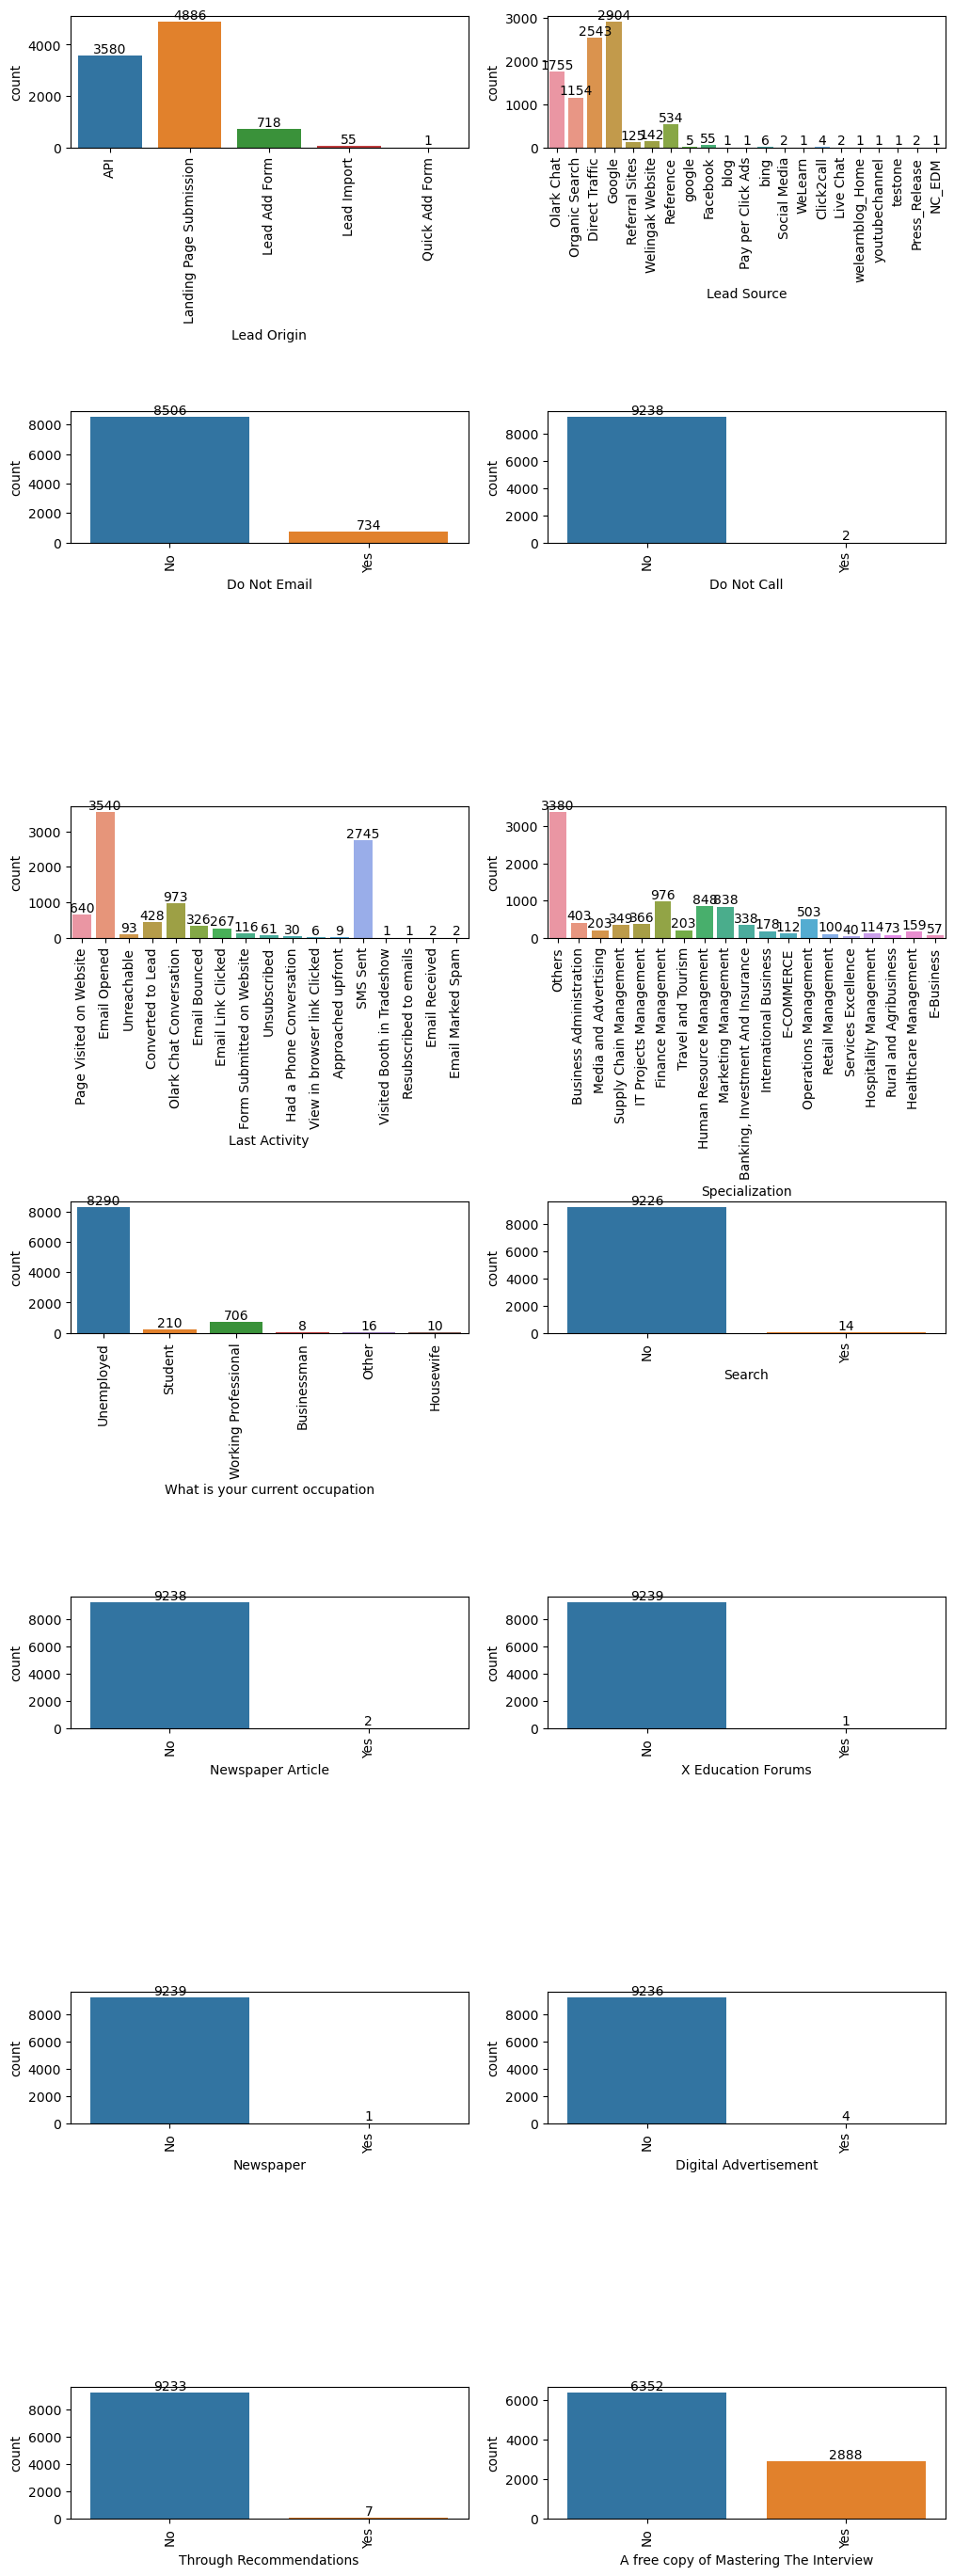

In [31]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = lead.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=lead) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

Columns having data which is highly skewed:
- Do Not Call
- Search
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations 

Hence dropping columns which are not used for analysis. Morever, Skewed variables can affect the performance of logistic regression models, as they can inaccurate parameter estimates.

In [32]:
# Dropping categorical columns with highly skewed data
lead.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)

In [33]:
lead.shape

(9240, 11)

In [34]:
lead.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

### Outlier Analysis

##### For Numerical Columns

In [35]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     

        plt.suptitle("\nOutliers",fontsize=20)
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

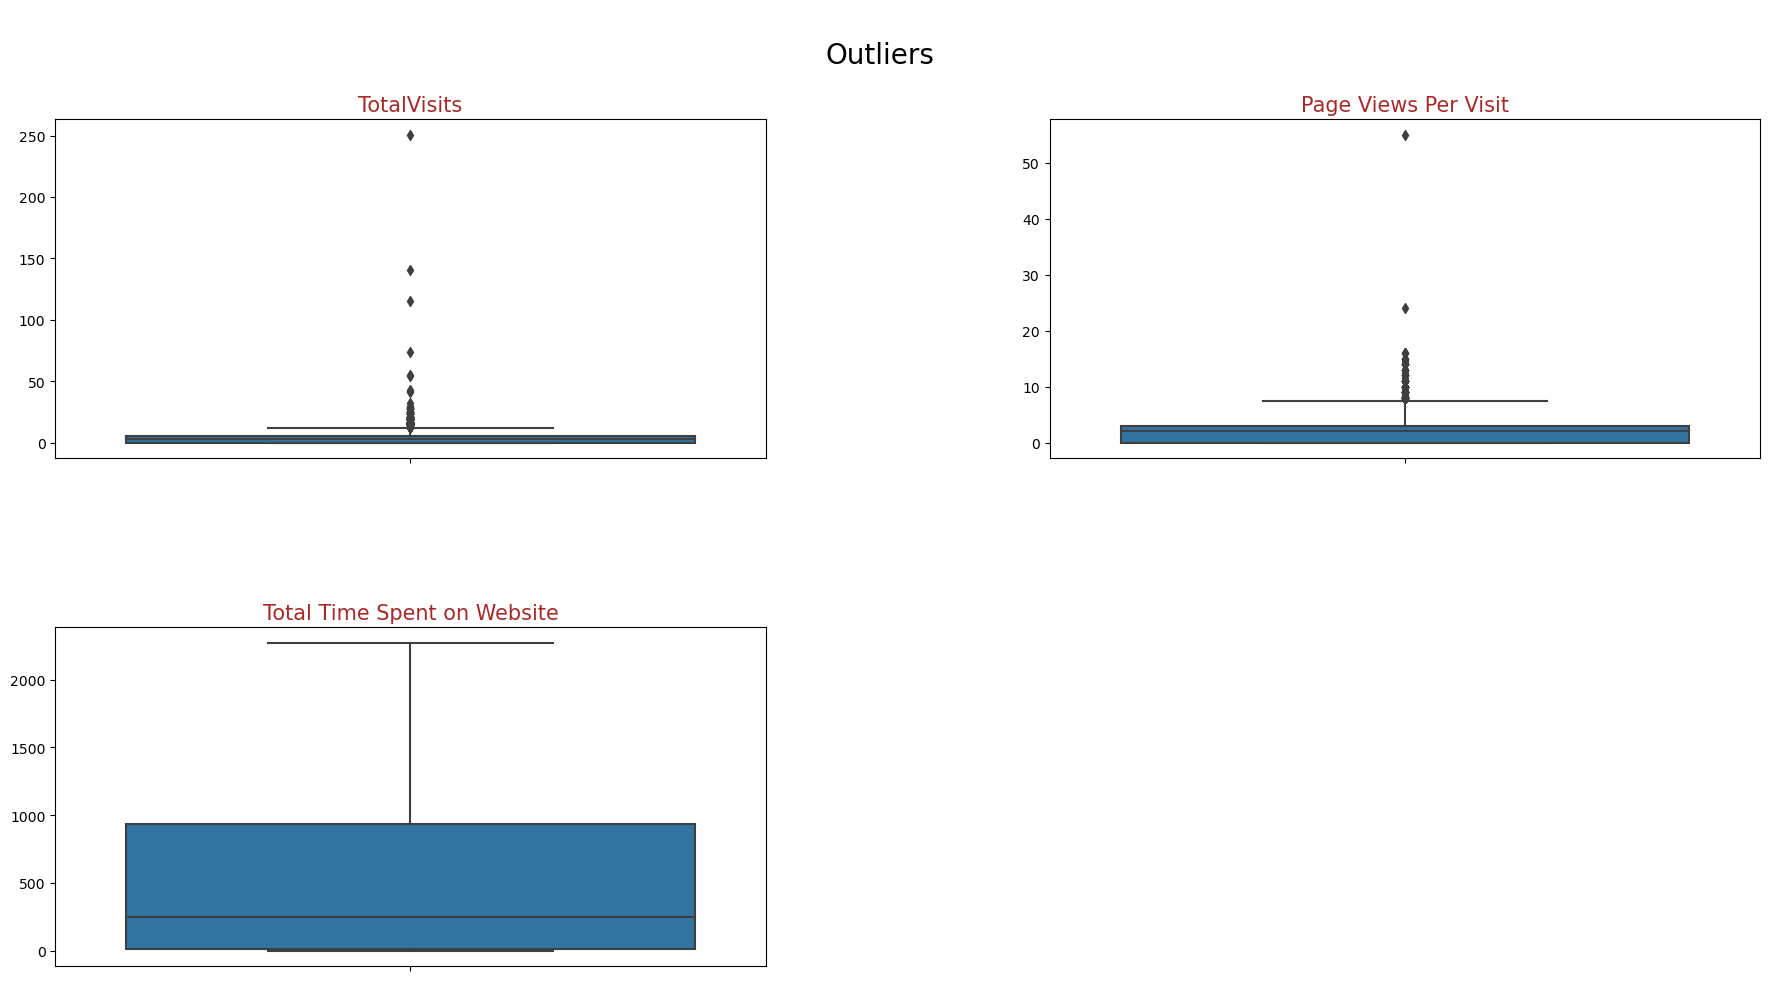

In [36]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
Check_Outliers(lead,num_cols)

"TotalVisits","Page Views Per Visit":Both these variables contain outliers as can be seen in the boxplot
So, These outliers needs to be treated for these variables

###### Outliers  treatment

In [37]:
# before outlier treatment
lead.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.394156                   487.698268   
std       0.486714     4.836682                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.327787  
std                2.164258  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max               55.000000

In [38]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1
        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])
        
        

In [39]:
# Checking outliers for numerical variables other than target variable 
capping_cols = ["TotalVisits","Page Views Per Visit"]
Outlier_treatment(lead,capping_cols)

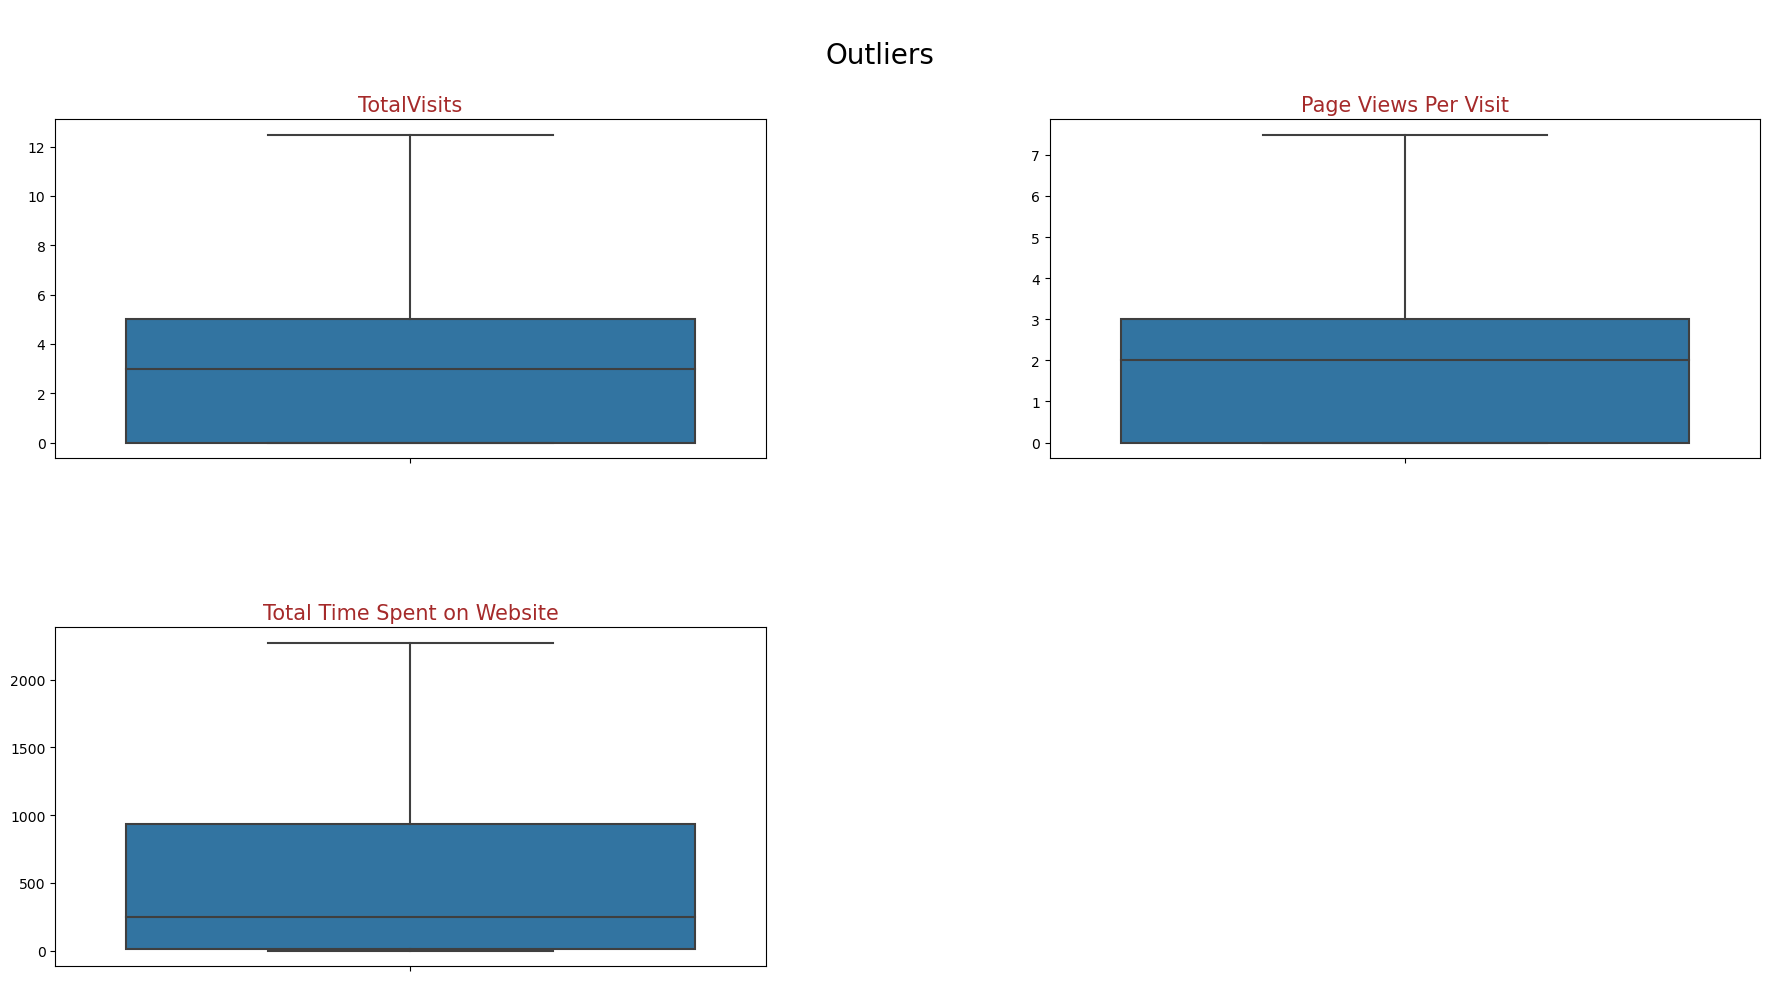

In [40]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
Check_Outliers(lead,num_cols)

In [41]:
# after outlier treatment detailed percentile values
lead.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.213853                   487.698268   
std       0.486714     3.005136                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000    12.500000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.274987  
std                1.917776  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max                7.500000

### Standardising Data columns

In [42]:
lead.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

In [43]:
## Categorical Variables 

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization","What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*lead[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("_^_"*40,"\n")


value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

_^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^_ 

value_counts % for : Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.0108

- Noticed that some categories in the "Lead Source" and "Last Activity"  columns have very few records. To prevent ending up with a bunch of unnecessary columns when we create dummy variables, we're planning to group these categories together as "Others" category.

- Also we can see "Google" & "google" are same in "Lead Source", so we will standardise the case.

In [44]:
# Grouping low frequency value levels to Others
lead['Lead Source'] = lead['Lead Source'].replace(["bing","Click2call","Press_Release", "Social Media","Live Chat","youtubechannel","testone","Pay per Click Ads","welearnblog_Home", "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
lead['Lead Source'] = lead['Lead Source'].replace("google","Google")

In [45]:
# value_counts percentage after replace
lead["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [46]:
# Grouping low frequency value levels to Others 
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam', 'Email Received','Visited Booth in Tradeshow','Resubscribed to emails'],'Others')

In [47]:
# value_counts percentage after replace
lead['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [48]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
lead.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
lead.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)


In [49]:
# Mapping binary categorical variables (Yes/No to 1/0) 
lead['Do Not Email'] = lead['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

lead['Free_copy'] = lead['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

In [50]:
lead["Do Not Email"].value_counts(normalize=True)*100

0    92.056277
1     7.943723
Name: Do Not Email, dtype: float64

In [51]:
lead["Free_copy"].value_counts(normalize=True)*100

0    68.744589
1    31.255411
Name: Free_copy, dtype: float64

In [52]:
#Checking data types
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


###  Data Analysis (EDA)

####  Data Imbalance


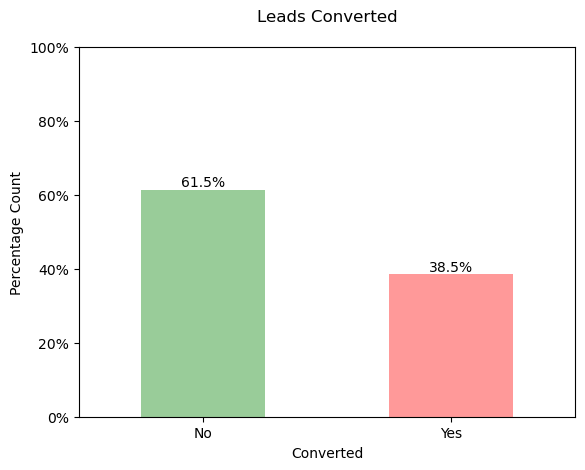

In [53]:
## ploting the results on bar plot

ax=(100*lead["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

plt.title("Leads Converted\n")

plt.xlabel('Converted')
plt.ylabel("Percentage Count")

ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()



- Conversion rate is of 38.5%, meaning only 38.5% of the people have converted to leads.
- While majority of people didnt convert to leads 61.5%.


In [54]:
### Ratio of Data Imbalance
ratio=(lead["Converted"].value_counts(normalize=True).loc[0])/(lead["Converted"].value_counts(normalize=True).loc[1])

print("Ratio : {:.2f} : {}".format(ratio,1))

Ratio : 1.59 : 1


### Univariate Analysis

In [55]:
lead.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  
0          0  
1          0  
2          1  
3          0  
4          0

#### Univariate Analysis for Categorical Variables

In [56]:
#List of categorical columns
cat_cols = ["Lead Origin","Current_occupation","Do Not Email","Free_copy","Lead Source","Last Activity","Specialization"]

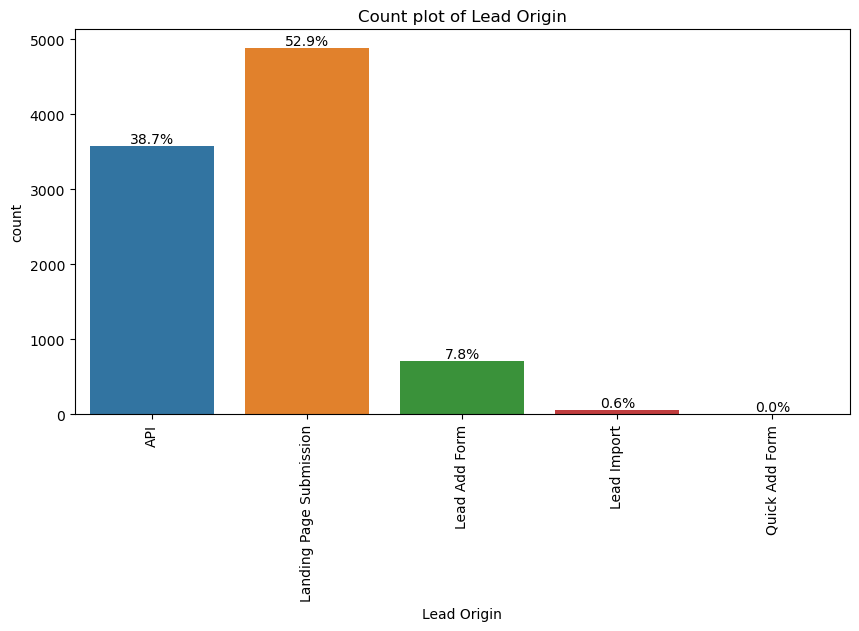

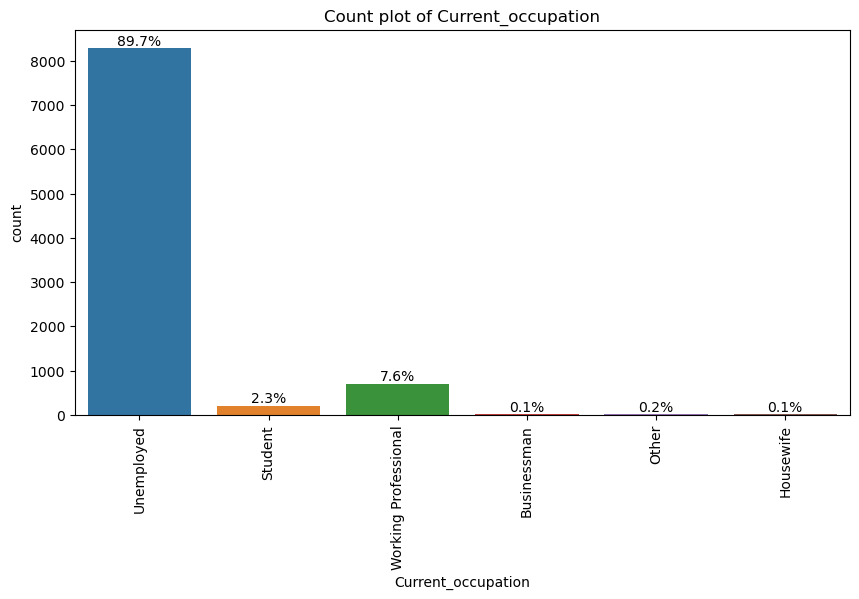

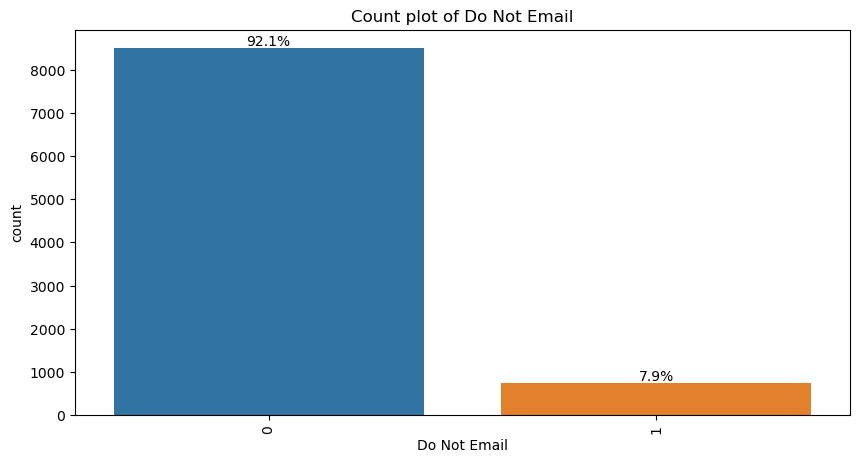

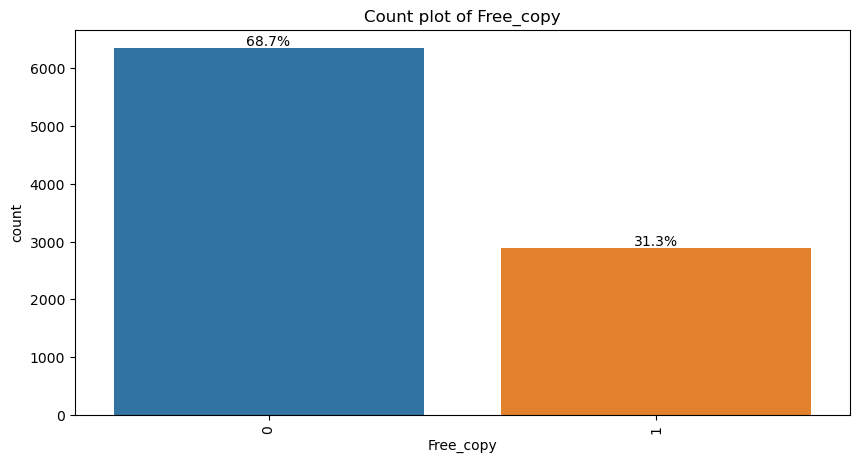

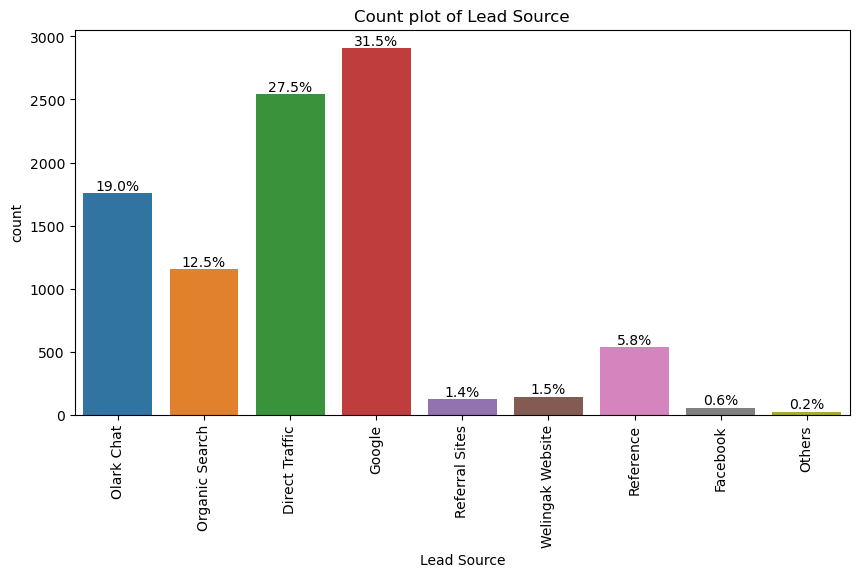

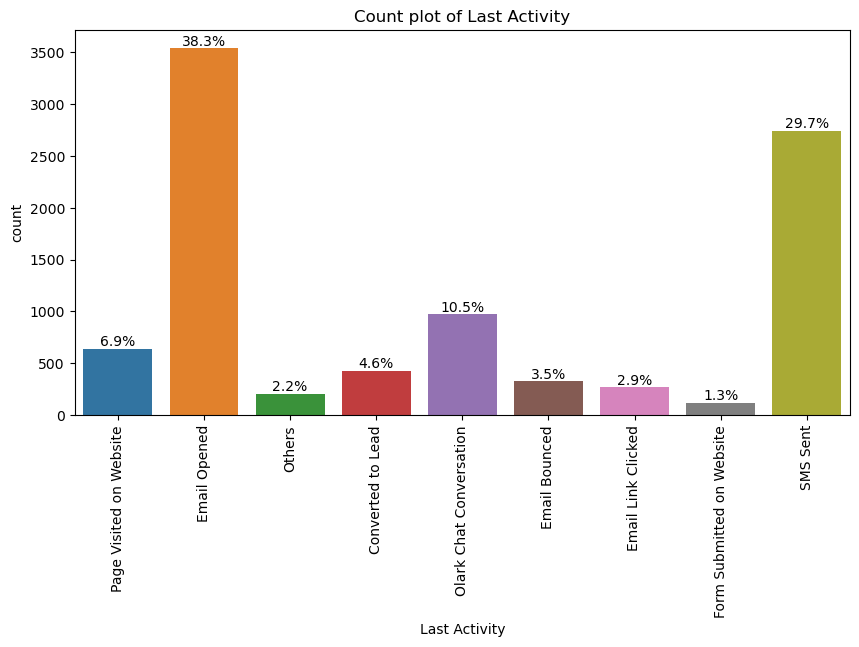

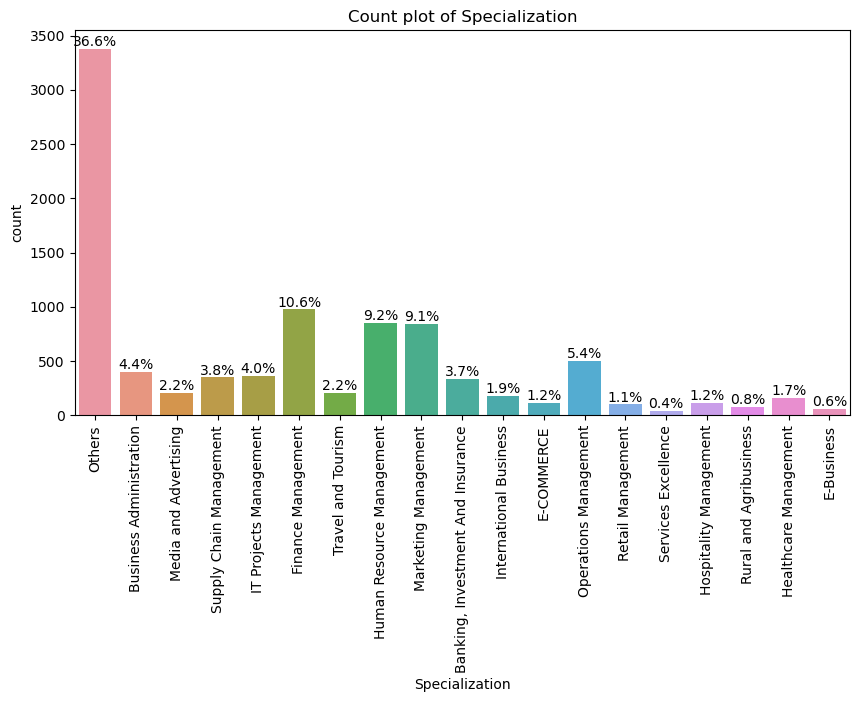

In [57]:
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i))
    ax=sns.countplot(x=i,data=lead)
    total=len(lead[i])
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        

- Lead Origin: Landing Page Submission identified 53% customers, API identified 39%.
- Current occupation: It has 90% of the customers as Unemployed
- Do Not Email: Around 8% of the people has opted that they dont want to be emailed about the course.
- Free_copy : 68% of the people did not opt for the free copy of mastering interview.
- Lead Source: 31% and 28% Lead source is from Google & Direct Traffic combined
- Last Activity: 30 % and 38% last activity of customers from SMS and 38% of Emails.


### Bivariate Analysis


#### Bivariate Analysis for Categorical Variables

In [58]:
# UDF "Bivariate_cat" tells comparision between Actual Distribution (value_count percentage) from the data and 
# 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name))
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name))
    ax=sns.countplot(x=variable_name,hue=Target,data=lead,palette="Set1",alpha=0.46)
    
    total=len(lead[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
          
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name))
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="Set2",alpha=0.85)   
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
 
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')


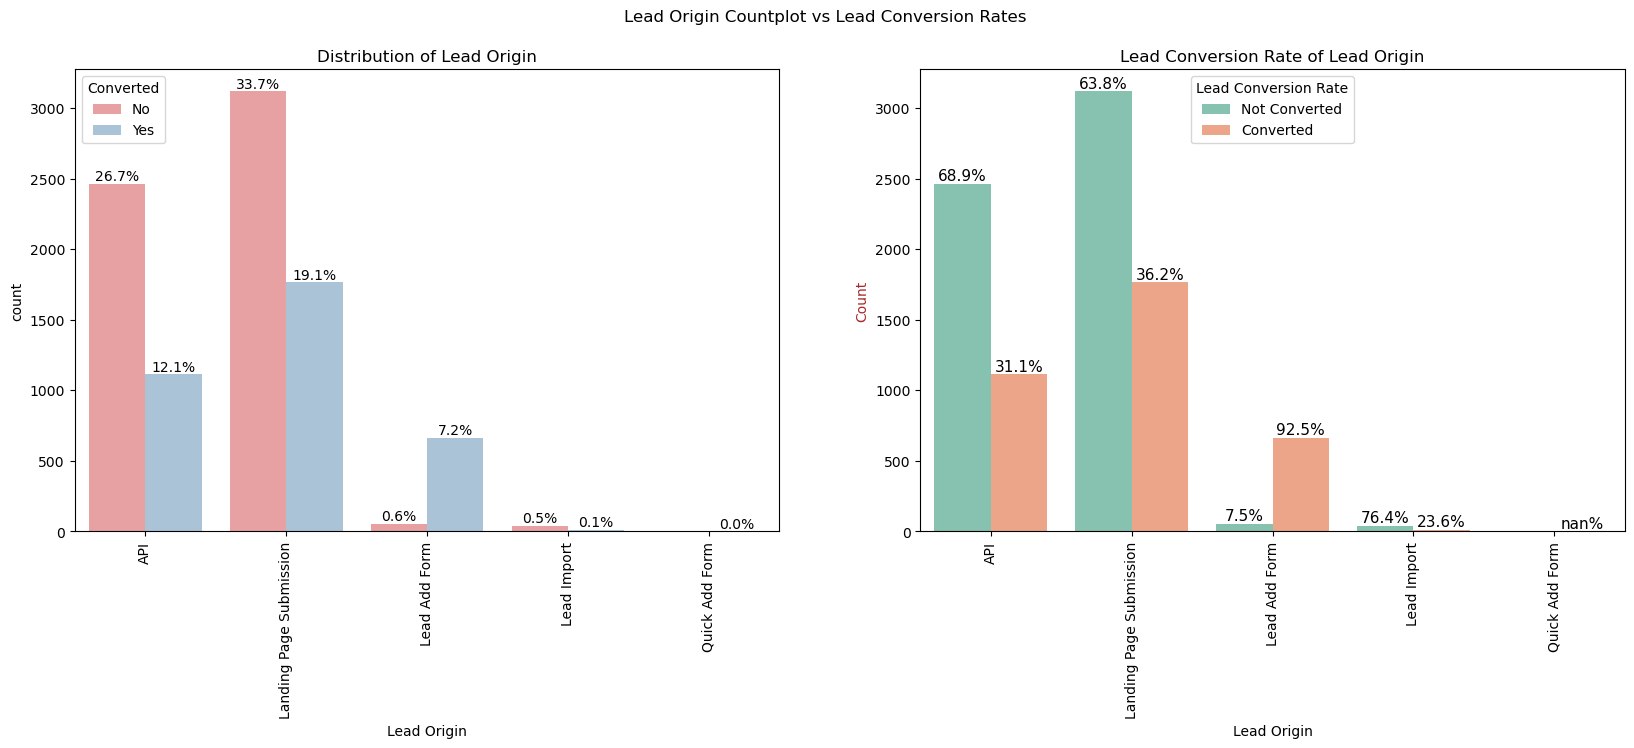

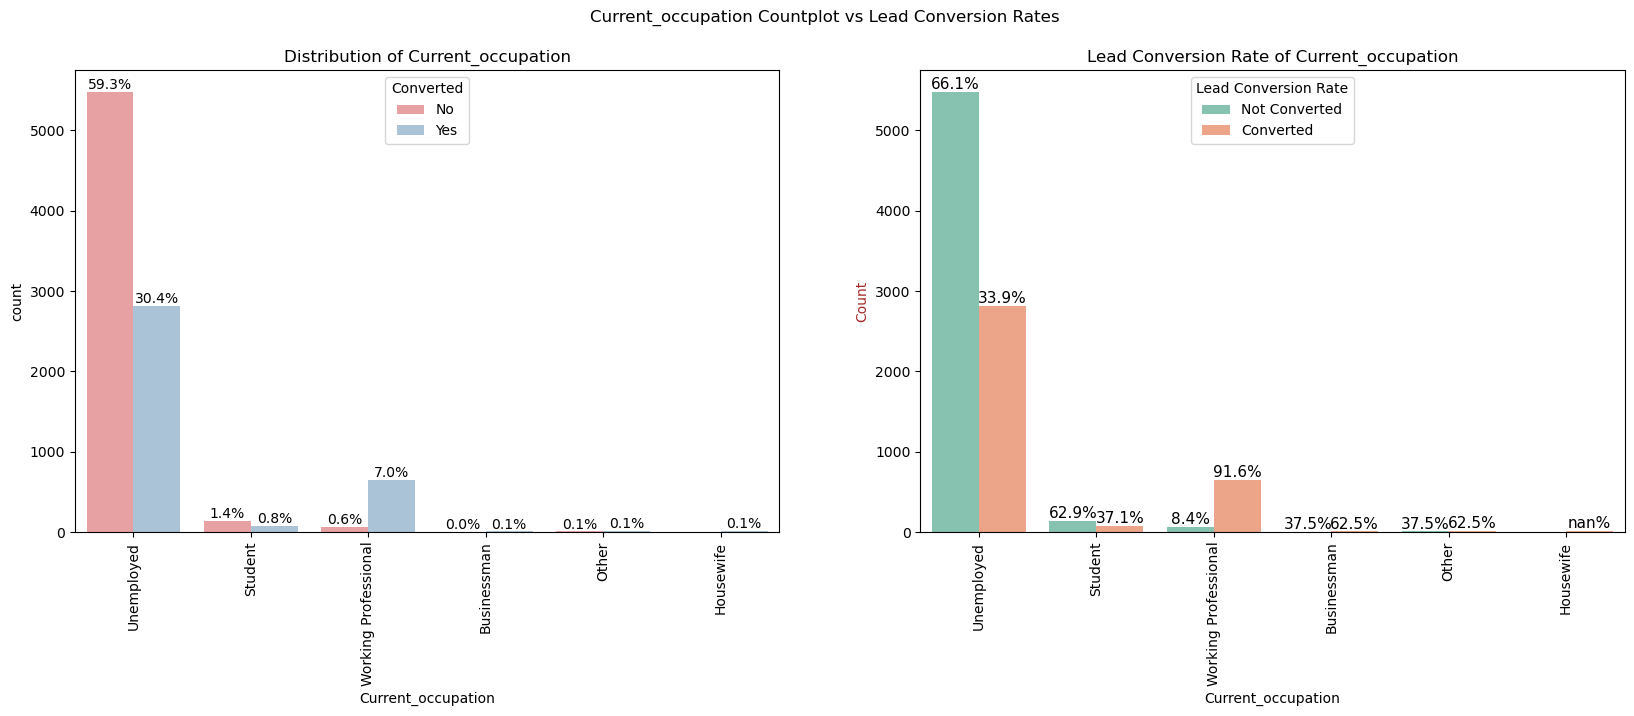

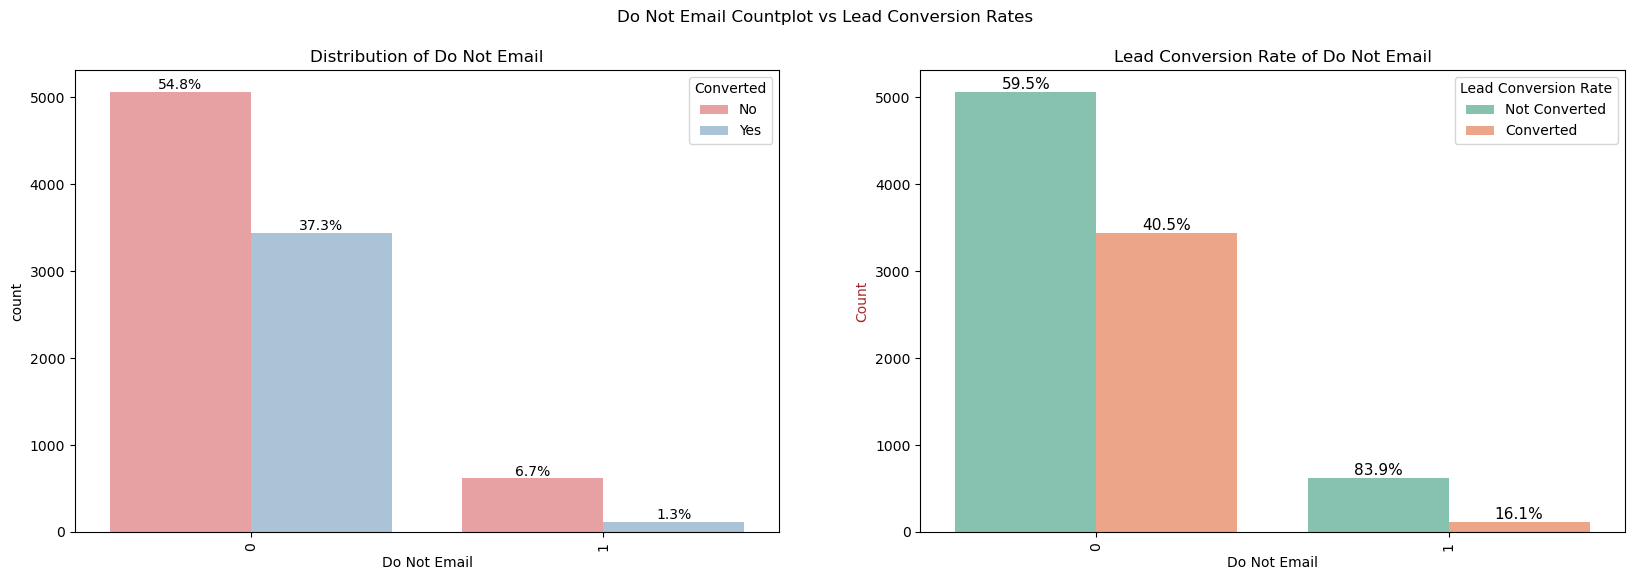

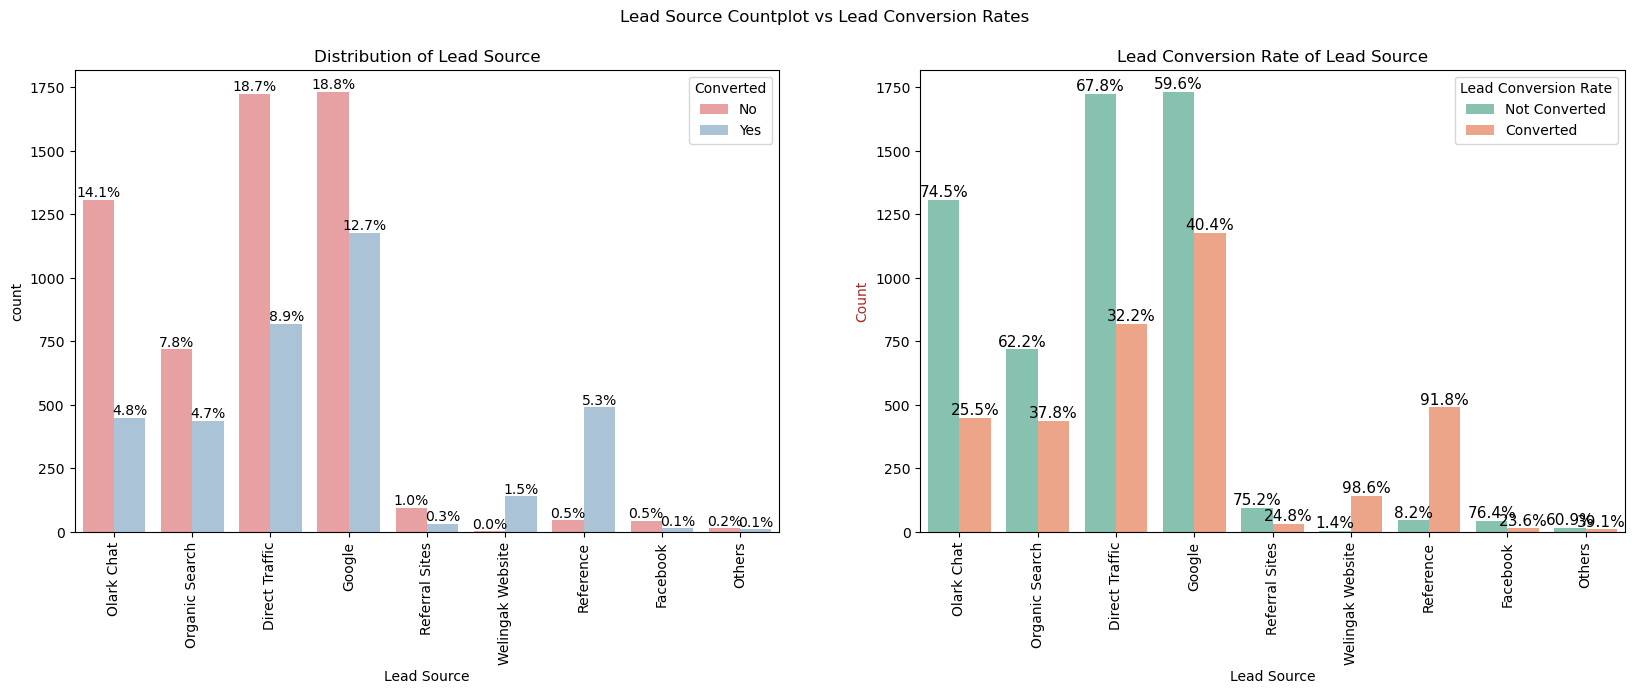

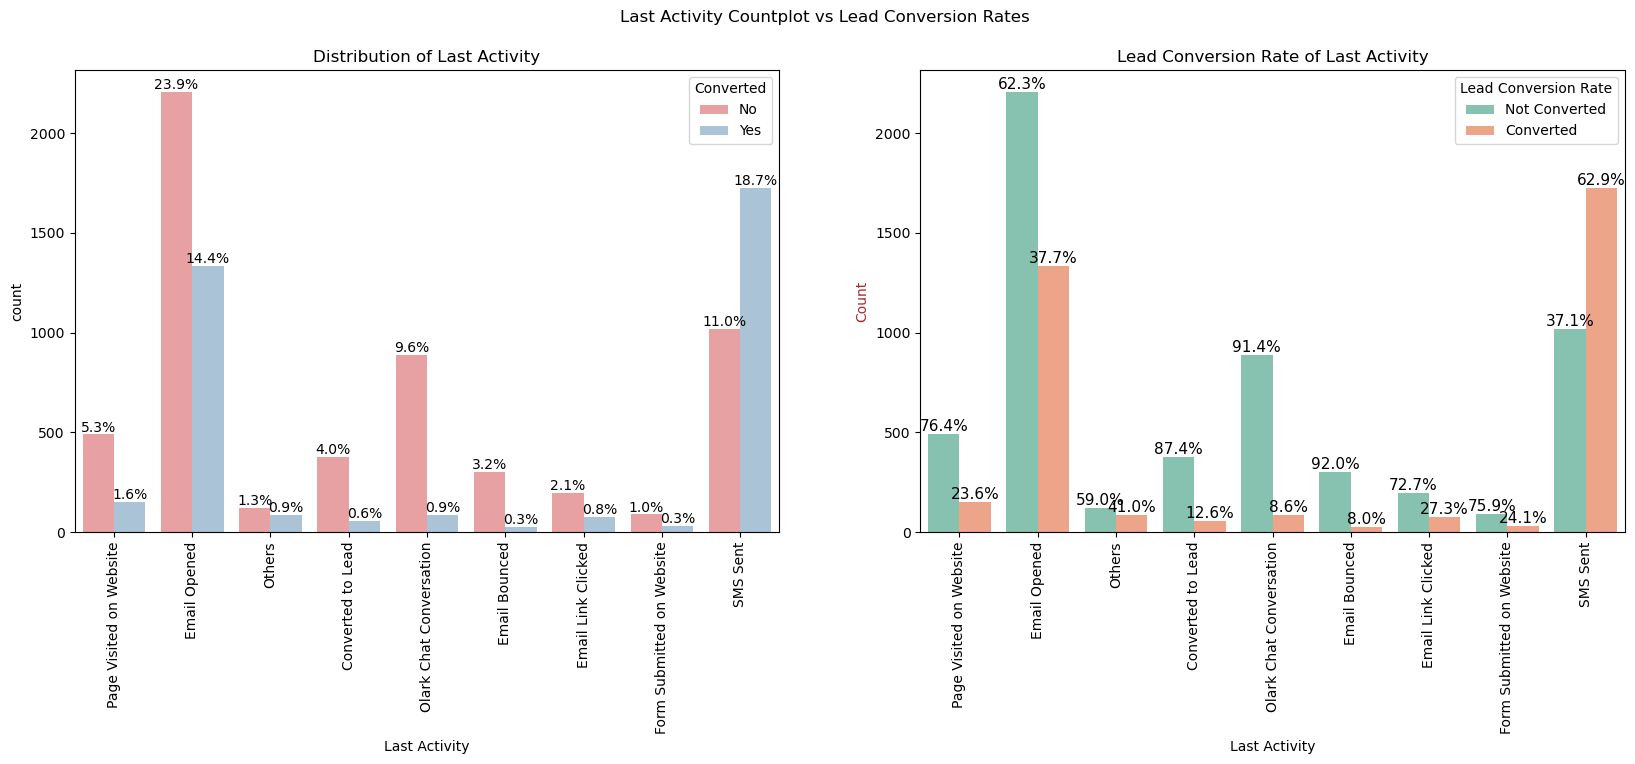

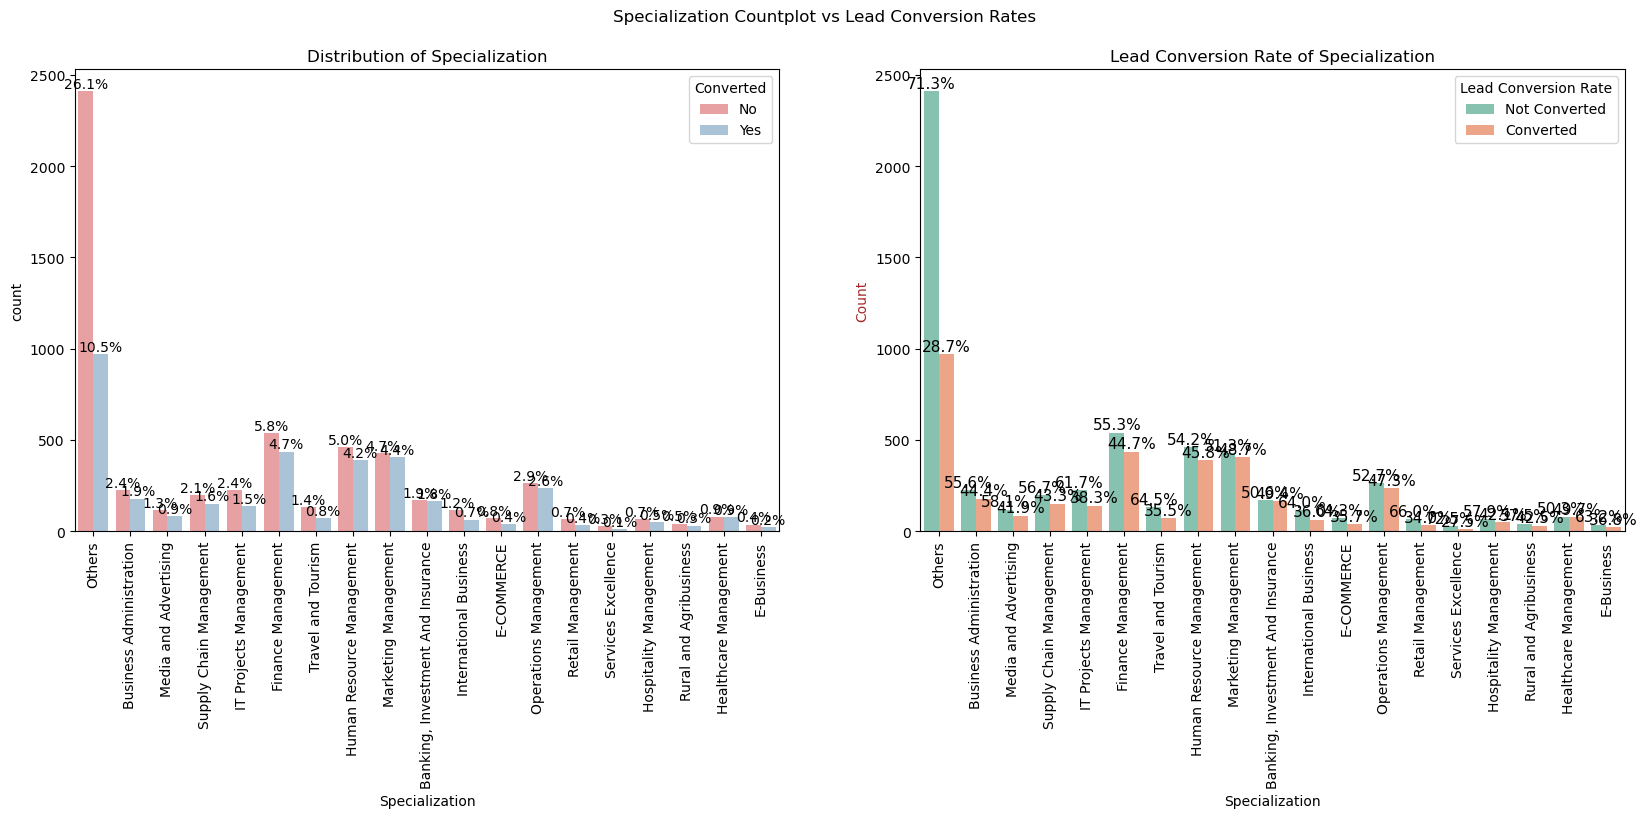

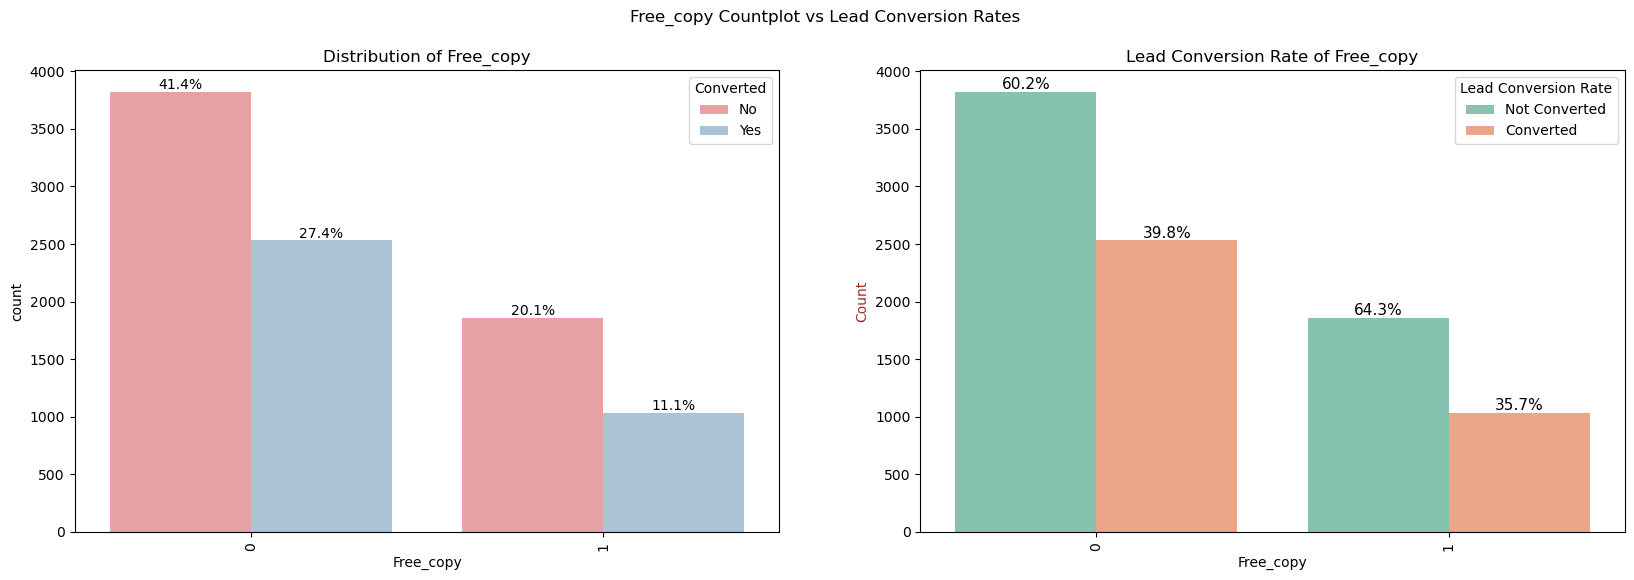

In [59]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
cat_cols = ["Lead Origin","Current_occupation","Do Not Email","Lead Source","Last Activity","Specialization","Free_copy"]

for i in cat_cols:
    Bivariate_cat(lead,variable_name=i)
    

- Lead Origin: Around 52% of customers in total from "Landing Page Submission" with a lead conversion rate (LCR) of 36%.The "API" identified approximately 39% of total customers with a lead conversion rate (LCR) of 31%.

- Current occupation: Around 90% of total customers who are Unemployed who has lead conversion rate (LCR) of 34%. While Working Professional contribute only 7.6% of total customers with almost has 92% lead conversion rate (LCR).

- Do Not Email: 92% of total customers has opted that they dont want to be emailed about the course.
- A copy of mastering interview : 69% of total customers has opted for that they dont want the free copy of mastering interview.

- Lead Source: Google has LCR of 40% out of 31% customers , Direct Traffic contributes 32% LCR with 27% customers which is lower than Google,Organic Search also gives 37.8% of LCR but the contribution is by only 12.5% of customers ,Reference has LCR of 91% but there are only around 6% of customers through this Lead Source.

- Last Activity: 'SMS Sent' has high lead conversion rate of 63% with 30% contribution from last activities, 'Email Opened' activity contributed 38% of last activities performed by the customers with 37% lead conversion rate.

- Specialization: Marketing Managemt,HR Management,Finance Management shows good contribution.

#### Bivariate Analysis for Numerical Variables

<Figure size 1600x400 with 0 Axes>

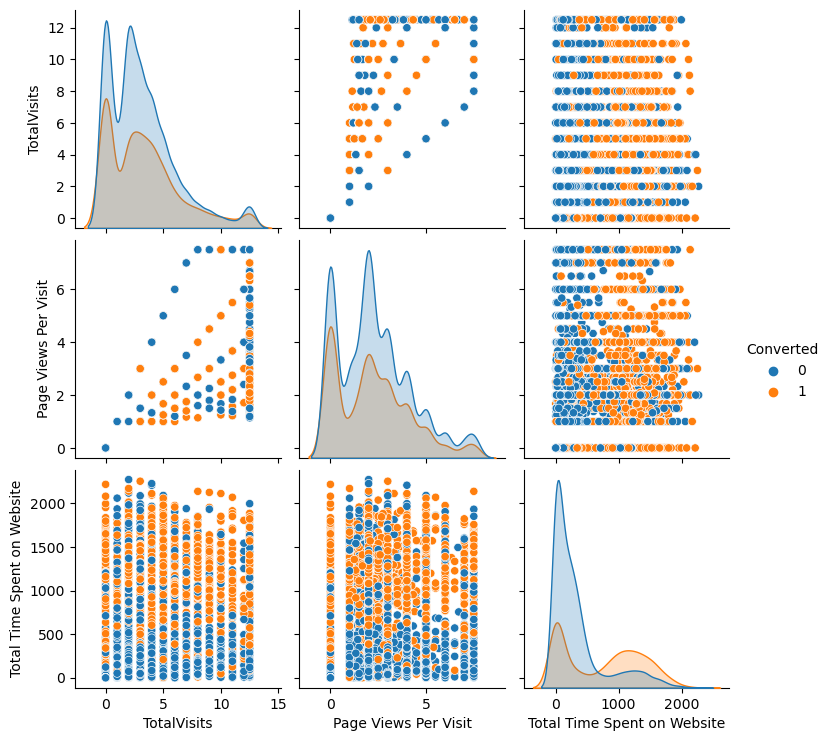

In [60]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=lead,vars=num_cols,hue="Converted")                                  
plt.show()

In [61]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

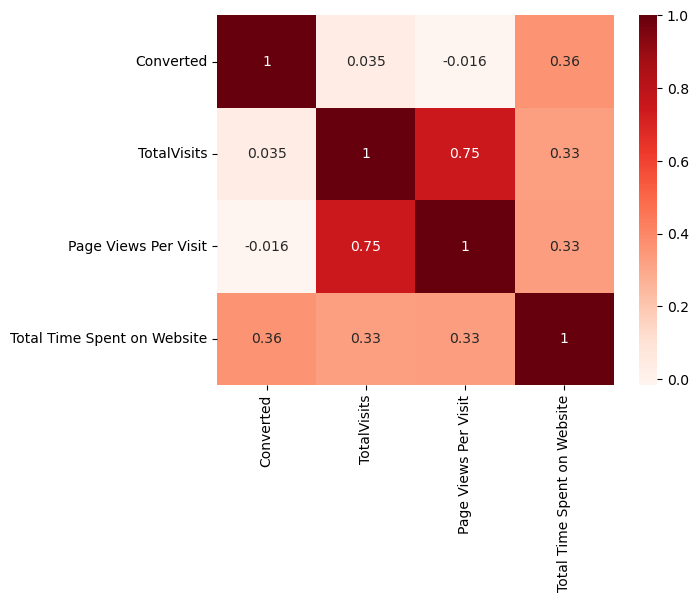

In [62]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=lead[num_cols].corr(),cmap="Reds",annot=True)
plt.show()

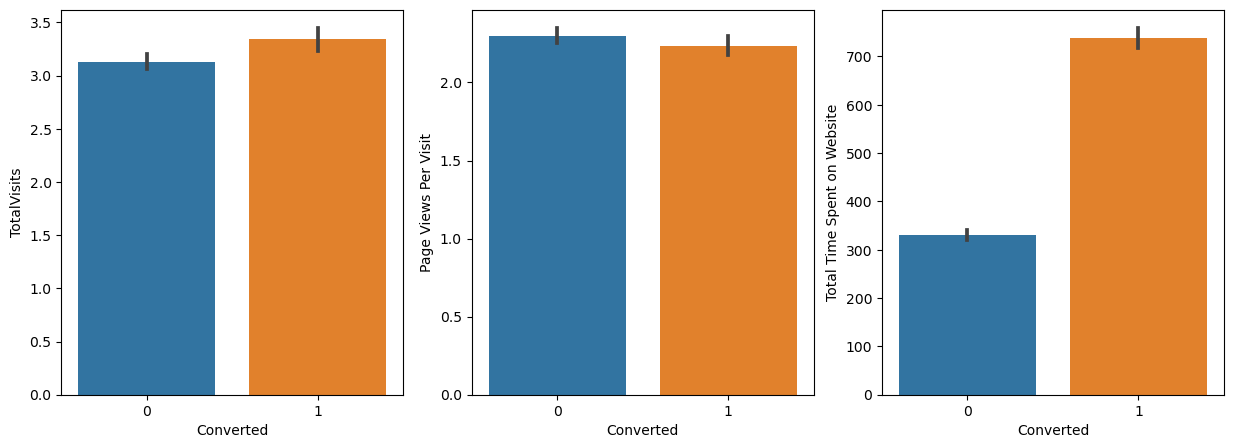

In [63]:
# barplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.barplot(y = 'TotalVisits', x = 'Converted', data = lead)
plt.subplot(1,3,2)
sns.barplot(y = 'Page Views Per Visit', x = 'Converted', data = lead)
plt.subplot(1,3,3)
sns.barplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead)
plt.show()

- There is a strong positive correlation between 'Total Visits' and 'Page Views per Visit', indicating that customers who visit the website more frequently tend to view more pages per visit.
- Customers who spend more time on the website have a higher LCR, indicating that increasing the time spent on the website can lead to higher conversion rates.

### Data Preparation

### Dummy Variables

In [64]:
lead.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  
0          0  
1          0  
2          1  
3          0  
4          0

In [65]:

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(lead[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy], axis=1)

In [66]:
lead.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  ...  \
0  Page Visited on Website                   Others         Unemployed  ...   
1             Email Opened                   Others         Unemployed  ...   
2             Email Opened  Business Administration            Student  ...   
3                   Others    Media and Advertising         Unemployed  ...   
4        Converted to Lead                   Others         Unemployed  ...   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  Current_occupation_Housewife  \
0                                  0                             0   
1                                  0                             0   
2                                  0                             0   
3                                  0                             0   
4                                  0                             0   

   Current_occupation_Other  Current_occupation_Student  \
0                         0                           0   
1                         0                           0   
2                         0                           1   
3                         0                           0   
4                         0                           0   

   Current_occupation_Unemployed  Current_occupation_Working Professional  
0                              1                                        0  
1                              1                                        0  
2                              0                                        0  
3                              1                                        0  
4                              1                                        0  

[5 rows x 54 columns]

In [67]:
# We have created dummies for the below variables, so we can drop them
lead = lead.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"],1)

In [68]:
lead.shape

(9240, 49)

In [69]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 8   Lead Origin_Lead Import                   9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                9240 non-null   uint8  
 10  Lead Source_Facebook                

### Test-Train Split 

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
# Putting predictor variables to X
X = lead.drop('Converted', axis=1)

# Putting Target variables to y
y = lead["Converted"]


In [72]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
# using standard scaler for scaling the features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


In [75]:
# X-train dataframe after standard scaling
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871     -0.291638    -1.064974                    -0.885371   
6795     -0.291638     0.262370                     0.005716   
3516     -0.291638     0.594206                    -0.691418   
8105     -0.291638     0.594206                     1.365219   
3934     -0.291638    -1.064974                    -0.885371   

      Page Views Per Visit  Free_copy  Lead Origin_Landing Page Submission  \
1871             -1.184892  -0.673169                                    0   
6795             -0.488713   1.485511                                    1   
3516              0.123715  -0.673169                                    0   
8105              1.432322  -0.673169                                    1   
3934             -1.184892  -0.673169                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  ...  \
1871                           0                     0  ...   
6795                           0                     0  ...   
3516                           0                     0  ...   
8105                           0                     0  ...   
3934                           0                     0  ...   

      Specialization_Retail Management  Specialization_Rural and Agribusiness  \
1871                                 0                                      0   
6795                                 0                                      0   
3516                                 0                                      0   
8105                                 0                                      0   
3934                                 0                                      0   

      Specialization_Services Excellence  \
1871                                   0   
6795                                   0   
3516                                   0   
8105                                   1   
3934                                   0   

      Specialization_Supply Chain Management  \
1871                                       0   
6795                                       0   
3516                                       0   
8105                                       0   
3934                                       0   

      Specialization_Travel and Tourism  Current_occupation_Housewife  \
1871                                  0                             0   
6795                                  0                             0   
3516                                  0                             0   
8105                                  0                             0   
3934                                  0                             0   

      Current_occupation_Other  Current_occupation_Student  \
1871                         0                           0   
6795                         0                           0   
3516                         0                           0   
8105                         0                           0   
3934                         0                           0   

      Current_occupation_Unemployed  Current_occupation_Working Professional  
1871                              1                                        0  
6795                              1                                        0  
3516                              1                                        0  
8105                              1                                        0  
3934                              1                                        0  

[5 rows x 48 columns]

In [76]:
# Checking the Lead Conversion Rate (LCR)

LCR = (sum(lead['Converted'])/len(lead['Converted'].index))*100
LCR

38.53896103896104

We have 38.5% Conversion Rate

### Correlations


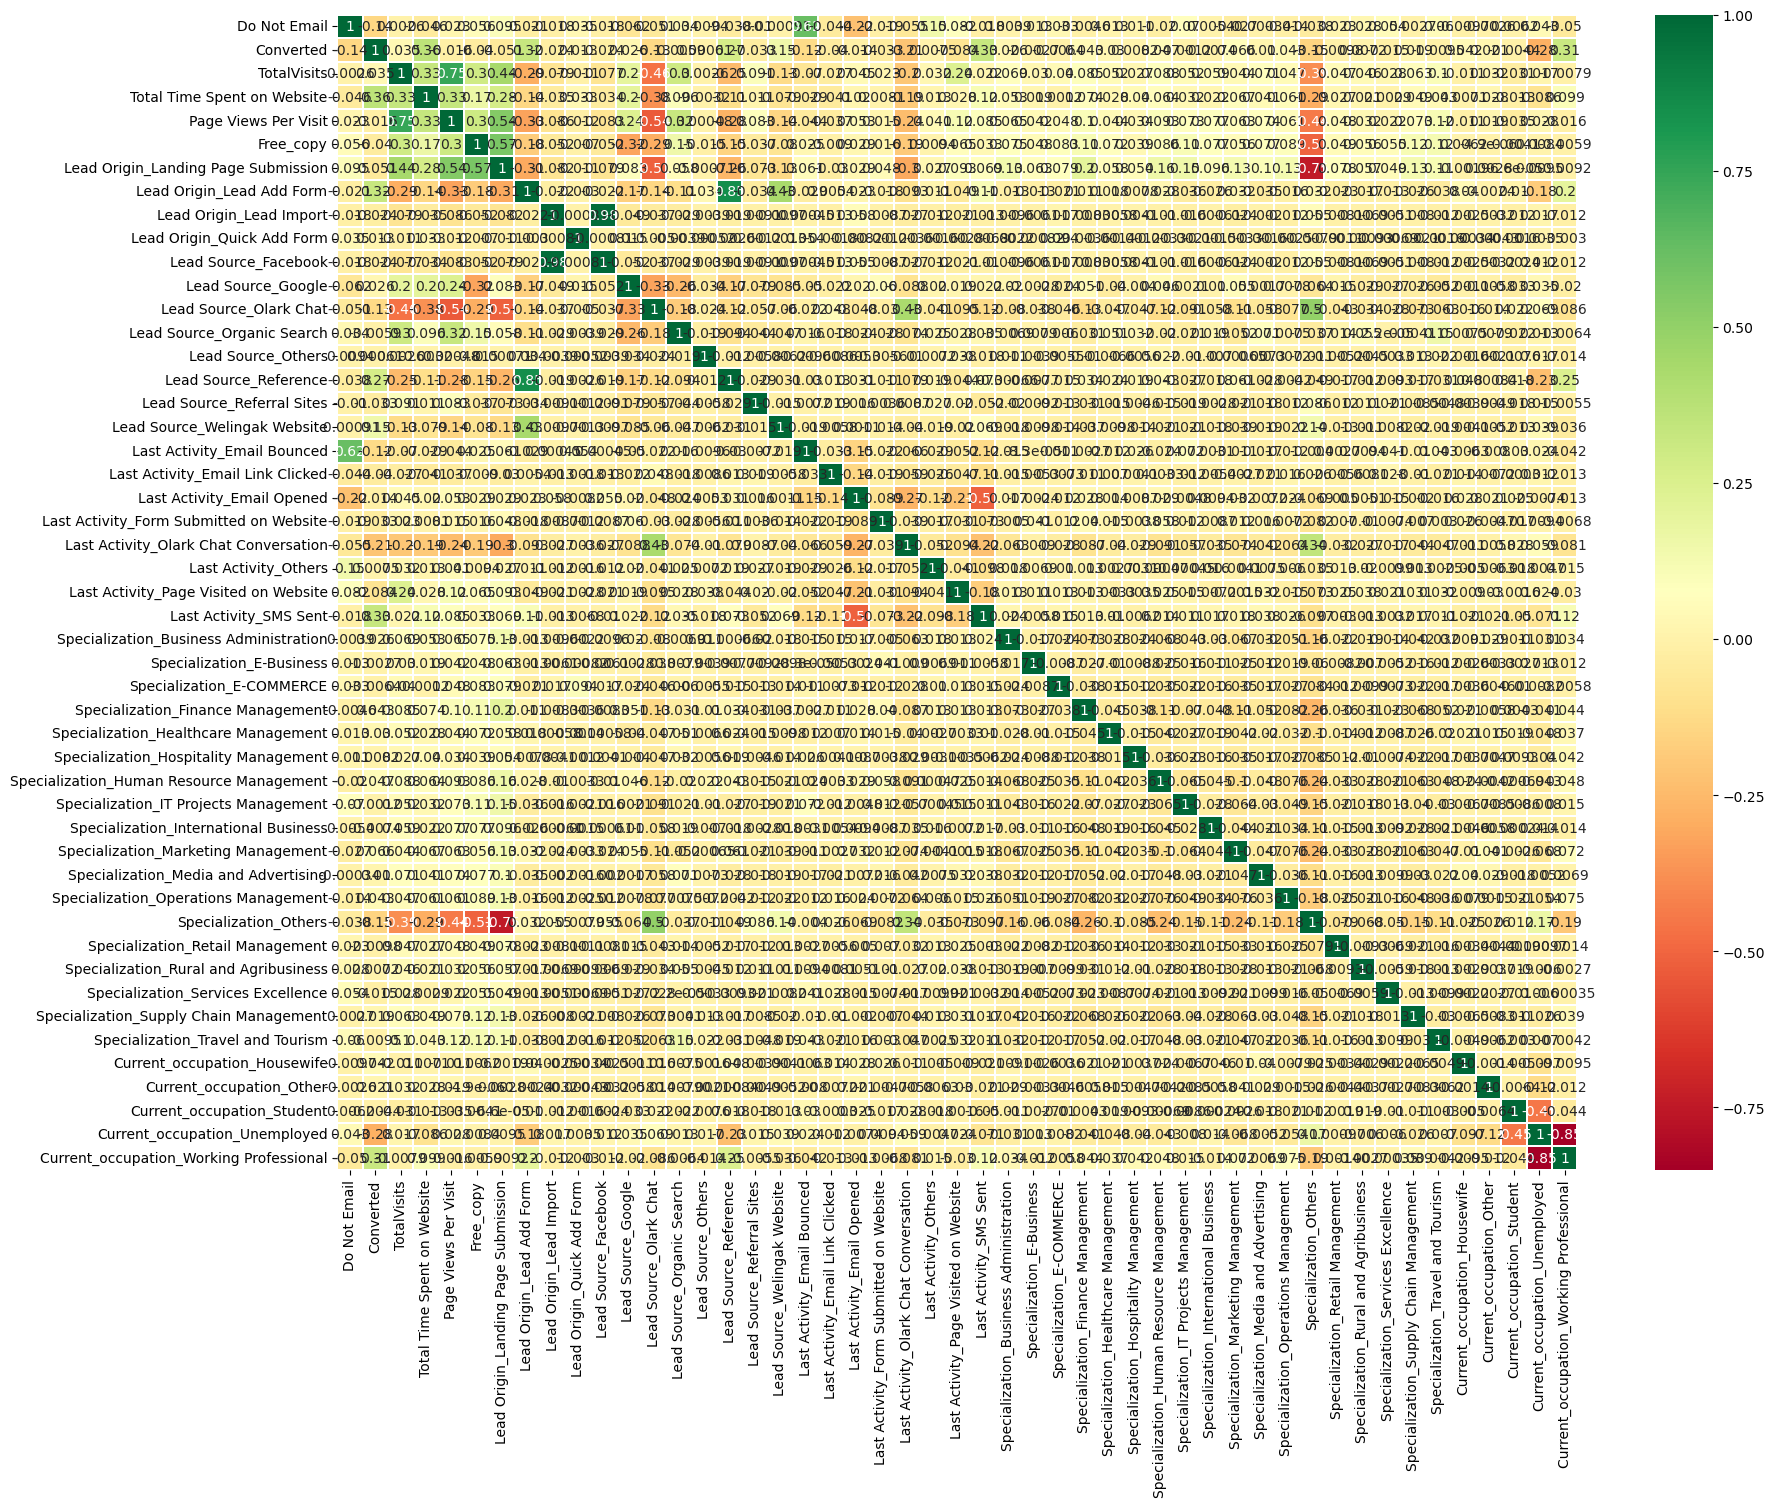

In [77]:
# analyse correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(lead.corr(),linewidths=0.01,cmap="RdYlGn",annot=True)
plt.show()

In [78]:
#top 10 Correlation for X_train
correlation_0_target = X_train.corr()
correlation_0_target = correlation_0_target.where(np.triu(np.ones(correlation_0_target.shape), k=1).astype(np.bool))
correlation_0_target = correlation_0_target.unstack().reset_index().dropna(subset = [0])
correlation_0_target.columns = ['VAR1', 'VAR2', 'Correlation_Value']
correlation_0_target['Corr_abs'] = abs(correlation_0_target['Correlation_Value'])
correlation_0_target.sort_values(by = "Corr_abs", ascending =False, inplace = True)
correlation_0_target.head(10)

VAR1  \
439                      Lead Source_Facebook   
678                     Lead Source_Reference   
2302  Current_occupation_Working Professional   
1781                    Specialization_Others   
145                      Page Views Per Visit   
816               Last Activity_Email Bounced   
244       Lead Origin_Landing Page Submission   
243       Lead Origin_Landing Page Submission   
531                    Lead Source_Olark Chat   
1171                   Last Activity_SMS Sent   

                                     VAR2  Correlation_Value  Corr_abs  
439               Lead Origin_Lead Import           0.969542  0.969542  
678             Lead Origin_Lead Add Form           0.862134  0.862134  
2302        Current_occupation_Unemployed          -0.859776  0.859776  
1781  Lead Origin_Landing Page Submission          -0.751185  0.751185  
145                           TotalVisits           0.739236  0.739236  
816                          Do Not Email           0.631980  0.631980  
244                             Free_copy           0.564758  0.564758  
243                  Page Views Per Visit           0.547857  0.547857  
531                  Page Views Per Visit          -0.535376  0.535376  
1171           Last Activity_Email Opened          -0.514381  0.514381

In [79]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

### Model Building 


#### Feature Selection 

In [80]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

In [81]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [82]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Free_copy', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 31),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 

In [83]:
# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

features  Feature Chosen  Ranking
22                    Last Activity_SMS Sent            True        1
41              Current_occupation_Housewife            True        1
35                     Specialization_Others            True        1
28     Specialization_Hospitality Management            True        1
20                      Last Activity_Others            True        1
19     Last Activity_Olark Chat Conversation            True        1
17                Last Activity_Email Opened            True        1
14              Lead Source_Welingak Website            True        1
12                     Lead Source_Reference            True        1
11                        Lead Source_Others            True        1
45   Current_occupation_Working Professional            True        1
9                     Lead Source_Olark Chat            True        1
7                       Lead Source_Facebook            True        1
5        Lead Origin_Landing Page Submission            True        1
2                Total Time Spent on Website            True        1
44             Current_occupation_Unemployed           False        2
42                  Current_occupation_Other           False        3
43                Current_occupation_Student           False        4
37     Specialization_Rural and Agribusiness           False        5
16          Last Activity_Email Link Clicked           False        6
31     Specialization_International Business           False        7
36          Specialization_Retail Management           False        8
1                                TotalVisits           False        9
3                       Page Views Per Visit           False       10
0                               Do Not Email           False       11
21     Last Activity_Page Visited on Website           False       12
23    Specialization_Business Administration           False       13
15               Last Activity_Email Bounced           False       14
34      Specialization_Operations Management           False       15
29  Specialization_Human Resource Management           False       16
32       Specialization_Marketing Management           False       17
4                                  Free_copy           False       18
6                 Lead Origin_Quick Add Form           False       19
38        Specialization_Services Excellence           False       20
39    Specialization_Supply Chain Management           False       21
8                         Lead Source_Google           False       22
25                 Specialization_E-COMMERCE           False       23
13                Lead Source_Referral Sites           False       24
30     Specialization_IT Projects Management           False       25
27      Specialization_Healthcare Management           False       26
26         Specialization_Finance Management           False       27
10                Lead Source_Organic Search           False       28
33      Specialization_Media and Advertising           False       29
24                 Specialization_E-Business           False       30
18   Last Activity_Form Submitted on Website           False       31
40         Specialization_Travel and Tourism           False       32

In [84]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

In [85]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Free_copy',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
      

### Model 1

In [86]:
import statsmodels.api as sm

In [87]:
# Building model using statsmodels, for the detailed statistics

rfe_col=X_train.columns[rfe.support_]
X_train_rfe = X_train[rfe_col]
X_train_sm1 = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                      -1.033284
Total Time Spent on Website                 1.050544
Lead Origin_Landing Page Submission        -1.272090
Lead Source_Facebook                       -0.696059
Lead Source_Olark Chat                      0.900083
Lead Source_Others                          0.980708
Lead Source_Reference                       2.897685
Lead Source_Welingak Website                5.380227
Last Activity_Email Opened                  0.950623
Last Activity_Olark Chat Conversation      -0.553411
Last Activity_Others                        1.258012
Last Activity_SMS Sent                      2.068763
Specialization_Hospitality Management      -1.072037
Specialization_Others                      -1.193681
Current_occupation_Housewife               23.022209
Current_occupation_Working Professional     2.685466
dtype: float64

In [88]:
#Summary  logistic regression model
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Mon, 17 Jul 2023   Deviance:                       5465.5
Time:                        20:16:36   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0333      0.144     -7.155      0.000      -1.316      -0.750
Total Time Spent on Website                 1.0505      0.039     27.169      0.000       0.975       1.126
Lead Origin_Landing Page Submission        -1.2721      0.126    -10.059      0.000      -1.520      -1.024
Lead Source_Facebook                       -0.6961      0.529     -1.316      0.188      -1.733       0.340
Lead Source_Olark Chat                      0.9001      0.119      7.585      0.000       0.668       1.133
Lead Source_Others                          0.9807      0.512      1.915      0.056      -0.023       1.985
Lead Source_Reference                       2.8977      0.216     13.434      0.000       2.475       3.320
Lead Source_Welingak Website                5.3802      0.729      7.384      0.000       3.952       6.808
Last Activity_Email Opened                  0.9506      0.105      9.061      0.000       0.745       1.156
Last Activity_Olark Chat Conversation      -0.5534      0.187     -2.956      0.003      -0.920      -0.186
Last Activity_Others                        1.2580      0.238      5.276      0.000       0.791       1.725
Last Activity_SMS Sent                      2.0688      0.108     19.188      0.000       1.857       2.280
Specialization_Hospitality Management      -1.0720      0.324     -3.310      0.001      -1.707      -0.437
Specialization_Others                      -1.1937      0.121     -9.841      0.000      -1.431      -0.956
Current_occupation_Housewife               23.0222   1.33e+04      0.002      0.999    -2.6e+04     2.6e+04
Current_occupation_Working Professional     2.6855      0.190     14.104      0.000       2.312       3.059
===========================================================================================================
"""

 "Current_occupation_Housewife" column will be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05 for statistical significance.

### Model 2

In [89]:
# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("Current_occupation_Housewife")

In [90]:
X_train_rfe = X_train[rfe_col]

X_train_sm2 = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                                     -1.025075
Total Time Spent on Website                1.049364
Lead Origin_Landing Page Submission       -1.267369
Lead Source_Facebook                      -0.696913
Lead Source_Olark Chat                     0.899051
Lead Source_Others                         0.973897
Lead Source_Reference                      2.917123
Lead Source_Welingak Website               5.379144
Last Activity_Email Opened                 0.949036
Last Activity_Olark Chat Conversation     -0.558345
Last Activity_Others                       1.248172
Last Activity_SMS Sent                     2.058828
Specialization_Hospitality Management     -1.079528
Specialization_Others                     -1.197801
Current_occupation_Working Professional    2.677350
dtype: float64

In [91]:
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Mon, 17 Jul 2023   Deviance:                       5480.7
Time:                        20:16:36   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0251      0.144     -7.111      0.000      -1.308      -0.743
Total Time Spent on Website                 1.0494      0.039     27.177      0.000       0.974       1.125
Lead Origin_Landing Page Submission        -1.2674      0.126    -10.030      0.000      -1.515      -1.020
Lead Source_Facebook                       -0.6969      0.529     -1.318      0.187      -1.733       0.339
Lead Source_Olark Chat                      0.8991      0.119      7.580      0.000       0.667       1.132
Lead Source_Others                          0.9739      0.512      1.902      0.057      -0.030       1.977
Lead Source_Reference                       2.9171      0.215     13.538      0.000       2.495       3.339
Lead Source_Welingak Website                5.3791      0.729      7.384      0.000       3.951       6.807
Last Activity_Email Opened                  0.9490      0.105      9.077      0.000       0.744       1.154
Last Activity_Olark Chat Conversation      -0.5583      0.187     -2.985      0.003      -0.925      -0.192
Last Activity_Others                        1.2482      0.238      5.238      0.000       0.781       1.715
Last Activity_SMS Sent                      2.0588      0.108     19.151      0.000       1.848       2.270
Specialization_Hospitality Management      -1.0795      0.324     -3.334      0.001      -1.714      -0.445
Specialization_Others                      -1.1978      0.121     -9.881      0.000      -1.435      -0.960
Current_occupation_Working Professional     2.6773      0.190     14.068      0.000       2.304       3.050
===========================================================================================================
"""

"Lead Source_Facebook" column will be removed from model due to high p-value of 0.187, which is above the accepted threshold of 0.05 for statistical significance.

### Model 3

In [92]:
# Dropping 'Lead Source_Facebook' column
rfe_col=rfe_col.drop("Lead Source_Facebook")

In [93]:
X_train_rfe = X_train[rfe_col]
X_train_sm3 = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  
logm3.params

const                                     -1.040542
Total Time Spent on Website                1.051824
Lead Origin_Landing Page Submission       -1.249311
Lead Source_Olark Chat                     0.916940
Lead Source_Others                         0.981395
Lead Source_Reference                      2.937179
Lead Source_Welingak Website               5.396676
Last Activity_Email Opened                 0.943420
Last Activity_Olark Chat Conversation     -0.558250
Last Activity_Others                       1.248700
Last Activity_SMS Sent                     2.055550
Specialization_Hospitality Management     -1.090368
Specialization_Others                     -1.194330
Current_occupation_Working Professional    2.675678
dtype: float64

In [94]:
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Mon, 17 Jul 2023   Deviance:                       5482.6
Time:                        20:16:37   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0405      0.144     -7.245      0.000      -1.322      -0.759
Total Time Spent on Website                 1.0518      0.039     27.262      0.000       0.976       1.127
Lead Origin_Landing Page Submission        -1.2493      0.125     -9.958      0.000      -1.495      -1.003
Lead Source_Olark Chat                      0.9169      0.118      7.773      0.000       0.686       1.148
Lead Source_Others                          0.9814      0.512      1.917      0.055      -0.022       1.985
Lead Source_Reference                       2.9372      0.215     13.661      0.000       2.516       3.359
Lead Source_Welingak Website                5.3967      0.728      7.409      0.000       3.969       6.824
Last Activity_Email Opened                  0.9434      0.105      9.028      0.000       0.739       1.148
Last Activity_Olark Chat Conversation      -0.5582      0.187     -2.984      0.003      -0.925      -0.192
Last Activity_Others                        1.2487      0.238      5.239      0.000       0.782       1.716
Last Activity_SMS Sent                      2.0555      0.107     19.124      0.000       1.845       2.266
Specialization_Hospitality Management      -1.0904      0.323     -3.377      0.001      -1.723      -0.458
Specialization_Others                      -1.1943      0.121     -9.873      0.000      -1.431      -0.957
Current_occupation_Working Professional     2.6757      0.190     14.063      0.000       2.303       3.049
===========================================================================================================
"""

"Lead Source_Others" column will be removed from model due to high p-value of 0.055, which is above the accepted threshold of 0.05 for statistical significance.

### Model 4

In [95]:
# Dropping 'Lead Source_others' column
rfe_col=rfe_col.drop("Lead Source_Others")

In [96]:
X_train_rfe = X_train[rfe_col]
X_train_sm4 = sm.add_constant(X_train_rfe)

logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

logm4.params

const                                     -1.023594
Total Time Spent on Website                1.049789
Lead Origin_Landing Page Submission       -1.258954
Lead Source_Olark Chat                     0.907184
Lead Source_Reference                      2.925326
Lead Source_Welingak Website               5.388662
Last Activity_Email Opened                 0.942099
Last Activity_Olark Chat Conversation     -0.555605
Last Activity_Others                       1.253061
Last Activity_SMS Sent                     2.051879
Specialization_Hospitality Management     -1.094445
Specialization_Others                     -1.203333
Current_occupation_Working Professional    2.669665
dtype: float64

In [97]:
#Let's see the summary of our logistic regression model
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Mon, 17 Jul 2023   Deviance:                       5486.1
Time:                        20:16:37   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

- Looks like Model 4 is stable and has significant p-values within the threshold (p-values < 0.05), so we will use it for further analysis.

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

In [100]:
# Checking VIFs for all variables in the Model 4 
get_vif(X_train_rfe)

Features   VIF
0                     Specialization_Others  2.47
1       Lead Origin_Landing Page Submission  2.45
2                Last Activity_Email Opened  2.36
3                    Last Activity_SMS Sent  2.20
4                    Lead Source_Olark Chat  2.14
5     Last Activity_Olark Chat Conversation  1.72
6                     Lead Source_Reference  1.31
7               Total Time Spent on Website  1.24
8   Current_occupation_Working Professional  1.21
9              Lead Source_Welingak Website  1.08
10                     Last Activity_Others  1.08
11    Specialization_Hospitality Management  1.02

- No variable needs to be dropped as they all have good VIF values less than 5.
- p-values for all variables is less than 0.05
- This model looks acceptable as everything is under control (p-values & VIFs).
- So we will final our Model 4 for Model Evaluation.

### Model Evaluation 


In [101]:
# Getting the predicted values on the train set
y_train_pred = logm4.predict(X_train_sm4)      

y_train_pred[:10]

1871    0.474082
6795    0.073252
3516    0.249087
8105    0.768973
3934    0.212973
4844    0.987807
3297    0.108454
8071    0.996128
987     0.169259
7423    0.869641
dtype: float64

In [102]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47408215, 0.07325161, 0.24908697, 0.7689732 , 0.2129729 ,
       0.9878074 , 0.1084541 , 0.99612765, 0.16925902, 0.86964073])

In [103]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.474082         1871
1          0        0.073252         6795
2          0        0.249087         3516
3          0        0.768973         8105
4          0        0.212973         3934

Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

In [104]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.474082         1871          0
1          0        0.073252         6795          0
2          0        0.249087         3516          0
3          0        0.768973         8105          1
4          0        0.212973         3934          0

#### Confusion Matrix

In [105]:
from sklearn import metrics

In [106]:
# Confusion matrix  (Actual / predicted)
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
confusion

array([[3588,  414],
       [ 846, 1620]], dtype=int64)

In [107]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3588       |   414
# converted           846        |   1620  


# Above is the confusion matrix when we use threshold of probability as 0.5

In [108]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8051948051948052


In [109]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [110]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.656934306569343

In [111]:
# Let us calculate specificity
TN / float(TN+FP)


0.896551724137931

In [112]:
# Calculating false postive rate 
FP/ float(TN+FP)

0.10344827586206896

In [113]:
# positive predictive value 
TP / float(TP+FP)

0.7964601769911505

In [114]:
# Negative predictive value
TN / float(TN+ FN)

0.8092016238159675

#### Plotting the ROC Curve

In [115]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [116]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

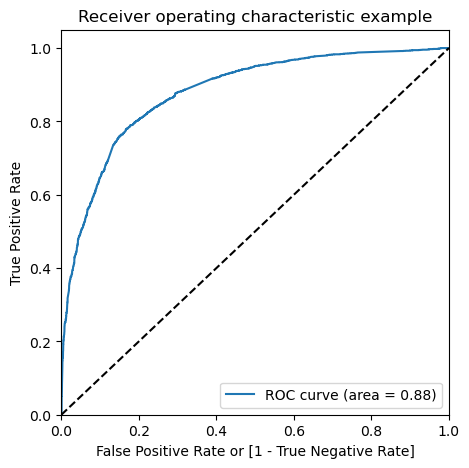

In [117]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

 Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

#### Finding Optimal Cutoff Point/ Probability

In [118]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.474082         1871          0    1    1    1    1    1   
1          0        0.073252         6795          0    1    0    0    0    0   
2          0        0.249087         3516          0    1    1    1    0    0   
3          0        0.768973         8105          1    1    1    1    1    1   
4          0        0.212973         3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    0    0    0    0    0

In [119]:
# calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.595702  0.973642  0.362819
0.2   0.2  0.721243  0.920114  0.598701
0.3   0.3  0.791280  0.832928  0.765617
0.4   0.4  0.813698  0.763585  0.844578
0.5   0.5  0.805195  0.656934  0.896552
0.6   0.6  0.792981  0.585969  0.920540
0.7   0.7  0.779066  0.507705  0.946277
0.8   0.8  0.754020  0.405515  0.968766
0.9   0.9  0.707792  0.247364  0.991504

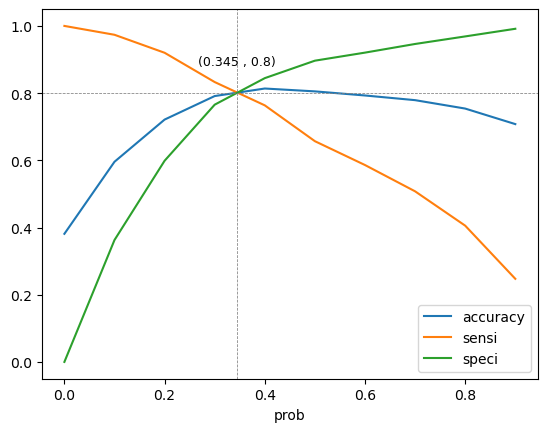

In [120]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

intersection_x = (intersection_1 + intersection_2) / 2

accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

plt.show()


- 0.345 is the approx. point where all the curves meet, so 0.345 seems to be our Optimal cutoff point for probability threshold .
- Lets do mapping again using optimal cutoff point 

In [121]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)

y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.474082         1871                1
1          0        0.073252         6795                0
2          0        0.249087         3516                0
3          0        0.768973         8105                1
4          0        0.212973         3934                0

In [122]:
# Assigning the lead score to training dataset

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

Converted  Converted_Prob  Prospect ID  final_predicted  lead_score
0           0        0.474082         1871                1          47
1           0        0.073252         6795                0           7
2           0        0.249087         3516                0          25
3           0        0.768973         8105                1          77
4           0        0.212973         3934                0          21
5           1        0.987807         4844                1          99
6           0        0.108454         3297                0          11
7           1        0.996128         8071                1         100
8           0        0.169259          987                0          17
9           1        0.869641         7423                1          87
10          1        0.815310         1032                1          82
11          0        0.298849         6542                0          30
12          1        0.116703         4317                0          12
13          1        0.416410         6472                1          42
14          0        0.053843          712                0           5
15          0        0.212973         3960                0          21
16          0        0.212973         4654                0          21
17          0        0.055536         5902                0           6
18          0        0.212973         4691                0          21
19          1        0.181907         4341                0          18

In [123]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])

0.8045763760049475

In [124]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3230,  772],
       [ 492, 1974]], dtype=int64)

In [125]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [126]:
#Sensitivity
TP / float(TP+FN)

0.8004866180048662

In [127]:
#Specificity
TN / float(TN+FP)

0.8070964517741129

Observation on Train Set

- Cutoff = 0.345
- Accuracy = 80.45%
- Sensitivity = 80.05%
- Specificity = 80.71%

#### Predictions on test set 

In [128]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   Free_copy                                 2772 non-null   int64  
 5   Lead Origin_Landing Page Submission       2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                2772 non-null   uint8  
 7   Lead Source_Facebook                      2772 non-null   uint8  
 8   Lead Source_Google                        2772 non-null   uint8  
 9   Lead Source_Olark Chat                    2772 non-null   uint8  
 10  Lead Source_Organic Search       

In [129]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
4269                     0.964504                                    0   
2376                    -0.885371                                    0   
7766                    -0.777416                                    0   
9199                    -0.885371                                    0   
4359                    -0.885371                                    0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4269                       0                      0   
2376                       0                      1   
7766                       0                      0   
9199                       1                      0   
4359                       0                      1   

      Lead Source_Welingak Website  Last Activity_Email Opened  \
4269                             0                           0   
2376                             0                           0   
7766                             0                           0   
9199                             0                           0   
4359                             0                           1   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
4269                                      0                     0   
2376                                      0                     0   
7766                                      0                     1   
9199                                      1                     0   
4359                                      0                     0   

      Last Activity_SMS Sent  Specialization_Hospitality Management  \
4269                       1                                      0   
2376                       1                                      0   
7766                       0                                      0   
9199                       0                                      0   
4359                       0                                      0   

      Specialization_Others  Current_occupation_Working Professional  
4269                      1                                        0  
2376                      1                                        0  
7766                      0                                        1  
9199                      1                                        0  
4359                      0                                        0

In [130]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 13)

In [131]:
# making prediction using model 4 (final model)
y_test_pred = logm4.predict(X_test_sm)

In [132]:
# top 10 columns
y_test_pred[:10]

4269    0.697934
2376    0.860665
7766    0.889241
9199    0.057065
4359    0.871510
9186    0.503859
1631    0.419681
8963    0.154531
8007    0.072344
5324    0.298849
dtype: float64

In [133]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269  0.697934
2376  0.860665
7766  0.889241
9199  0.057065
4359  0.871510

In [134]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [135]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.697934
1          1         2376  0.860665
2          1         7766  0.889241
3          0         9199  0.057065
4          1         4359  0.871510

In [136]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.697934
1         2376          1        0.860665
2         7766          1        0.889241
3         9199          0        0.057065
4         4359          1        0.871510

In [137]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        0.697934                1
1         2376          1        0.860665                1
2         7766          1        0.889241                1
3         9199          0        0.057065                0
4         4359          1        0.871510                1

In [138]:
# Assigning lead score to test dataset

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

Prospect ID  Converted  Converted_Prob  final_predicted  lead_score
0          4269          1        0.697934                1          70
1          2376          1        0.860665                1          86
2          7766          1        0.889241                1          89
3          9199          0        0.057065                0           6
4          4359          1        0.871510                1          87
5          9186          1        0.503859                1          50
6          1631          1        0.419681                1          42
7          8963          1        0.154531                0          15
8          8007          0        0.072344                0           7
9          5324          1        0.298849                0          30
10         2558          0        0.296737                0          30
11         8973          0        0.114542                0          11
12         2935          1        0.712417                1          71
13         2907          1        0.876253                1          88
14          957          1        0.226391                0          23
15          493          1        0.871510                1          87
16         3179          1        0.179631                0          18
17         3545          0        0.039202                0           4
18         6140          0        0.057065                0           6
19         4877          1        0.739816                1          74

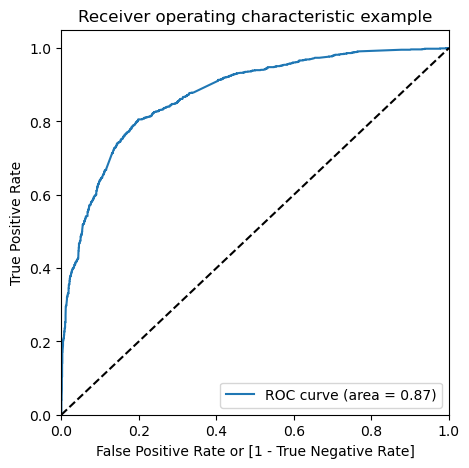

In [139]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

 Area under ROC curve is 0.87 out of 1 which indicates a good predictive model

### Model Evaluation

In [140]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8033910533910534

In [141]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1353,  324],
       [ 221,  874]], dtype=int64)

In [142]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [143]:
# Calculating the sensitivity
TP/(TP+FN)

0.7981735159817351

In [144]:
# Calculating the specificity
TN/(TN+FP)

0.8067978533094812

- The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

- For Test set
    - Accuracy    : 80.34%
    - Sensitivity : 79.82% 
    - Specificity : 80.68%
    
These matrics are very close to train set, so out final model logm4 is  performing with good consistency on both Train & Test set

# Conclusion

## Train - Test

#### Train Data Set           

- Accuracy:80.45%

- Sensitivity: 80.04%

- Specificity:80.71%

#### Test Data Set:

- Accuracy: 80.34%

- Sensitivity: 79.82% ≈ 80%

- Specificity:80.68%
 


- The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.


- The model achieved a sensitivity of 80.04% for train set and 79.82% for test set, using a cut-off value of 0.345.
- Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting
- The CEO of X Education had set a target sensitivity of around 80%.
- The model also achieved an accuracy of 80.46%, which is in line with the study's objectives.


